In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import sys
sys.path.append("../.") 
from geothermal_prediction.utils import save_to_csv
from geothermal_prediction.ml_well_gridsearch import MLFramework

# Load data
data = pd.read_csv('../data/processed/log_data_ml.csv')

# Scenario Parameters
TARGET_COLUMNS = ['Th_Cond', 'Th_Diff']
FEATURE_COLUMNS = [
    'Gamma_Ray_interpolated', 
    'Bulk_Density_interpolated', 
    'Porosity_interpolated',
    'Sonic_Log_interpolated'
]
GROUP_COLUMN = 'Well_ID'
DEPTH_COLUMN = 'Depth'

# Modeling Parameters
METRIC = 'MAE'
NUM_SPLITS = len(data['Well_ID'].unique())  # Number of cross-validation splits
N_TRIALS = 100    # Number of Optuna trials per model-target combination

# Random State for Reproducibility
RANDOM_STATE = 42


# Initialize the framework
framework = MLFramework(
    data=data, 
    target_columns=TARGET_COLUMNS, 
    group_column=GROUP_COLUMN, 
    feature_columns=FEATURE_COLUMNS,
    depth_column=DEPTH_COLUMN,
    metric=METRIC
)

# Define models and their hyperparameter grids

# Ridge Regressor Hyperparameter Grid
param_grid_ridge = {     
}

# Random Forest Regressor Hyperparameter Grid
param_grid_rf = {
}

# LightGBM Regressor Hyperparameter Grid
param_grid_lgbm = {
}

# XGBoost Regressor Hyperparameter Grid
param_grid_xgb = {
}

models_with_params = {
    'Ridge': (
        Ridge(random_state=RANDOM_STATE),
        param_grid_ridge
    ),
    'RandomForestRegressor': (
        RandomForestRegressor(random_state=RANDOM_STATE),
        param_grid_rf
    ),
    'LGBMRegressor': (
        LGBMRegressor(random_state=RANDOM_STATE),
        param_grid_lgbm
    ),
    'XGBRegressor': (
        XGBRegressor(random_state=RANDOM_STATE),
        param_grid_xgb
    )
}

# Evaluate models with custom nested CV and get final models
combined_results, final_models = framework.evaluate_models_custom_cv(
    models_with_params=models_with_params,
    num_splits=NUM_SPLITS,       # Number of cross-validation splits
    random_state=RANDOM_STATE
)

# Display combined results
combined_results_df = pd.DataFrame(combined_results).T
save_to_csv(combined_results_df, 'default_paramgrid', folder='data/results/')

# Collect predictions
results_df = framework.collect_predictions(
    combined_results=combined_results,
    models_with_params=models_with_params,
    num_splits=NUM_SPLITS
)
save_to_csv(results_df, 'default_results', folder='data/results/')


Evaluating Model: Ridge

Evaluating Hyperparameters: {}
Fold 1, Target Th_Cond, MAE: 0.3552 (n=482)
Fold 1, Target Th_Diff, MAE: 0.4833 (n=482)
Fold 2, Target Th_Cond, MAE: 0.6251 (n=351)
Fold 2, Target Th_Diff, MAE: 0.8228 (n=351)
Fold 3, Target Th_Cond, MAE: 0.4827 (n=270)
Fold 3, Target Th_Diff, MAE: 0.3549 (n=270)
Fold 4, Target Th_Cond, MAE: 0.7706 (n=27)
Fold 4, Target Th_Diff, MAE: 0.4302 (n=27)
Average MAE for {} on target 'Th_Cond': 0.4794
Average MAE for {} on target 'Th_Diff': 0.5568
Best Hyperparameters for target 'Th_Cond': {} with MAE: 0.4794
Best Hyperparameters for target 'Th_Diff': {} with MAE: 0.5568
Final model trained for target 'Th_Cond' with Ridge.
Final model trained for target 'Th_Diff' with Ridge.

Evaluating Model: RandomForestRegressor

Evaluating Hyperparameters: {}
Fold 1, Target Th_Cond, MAE: 0.4483 (n=482)
Fold 1, Target Th_Diff, MAE: 0.4875 (n=482)
Fold 2, Target Th_Cond, MAE: 0.8806 (n=351)
Fold 2, Target Th_Diff, MAE: 0.6513 (n=351)
Fold 3, Target Th_

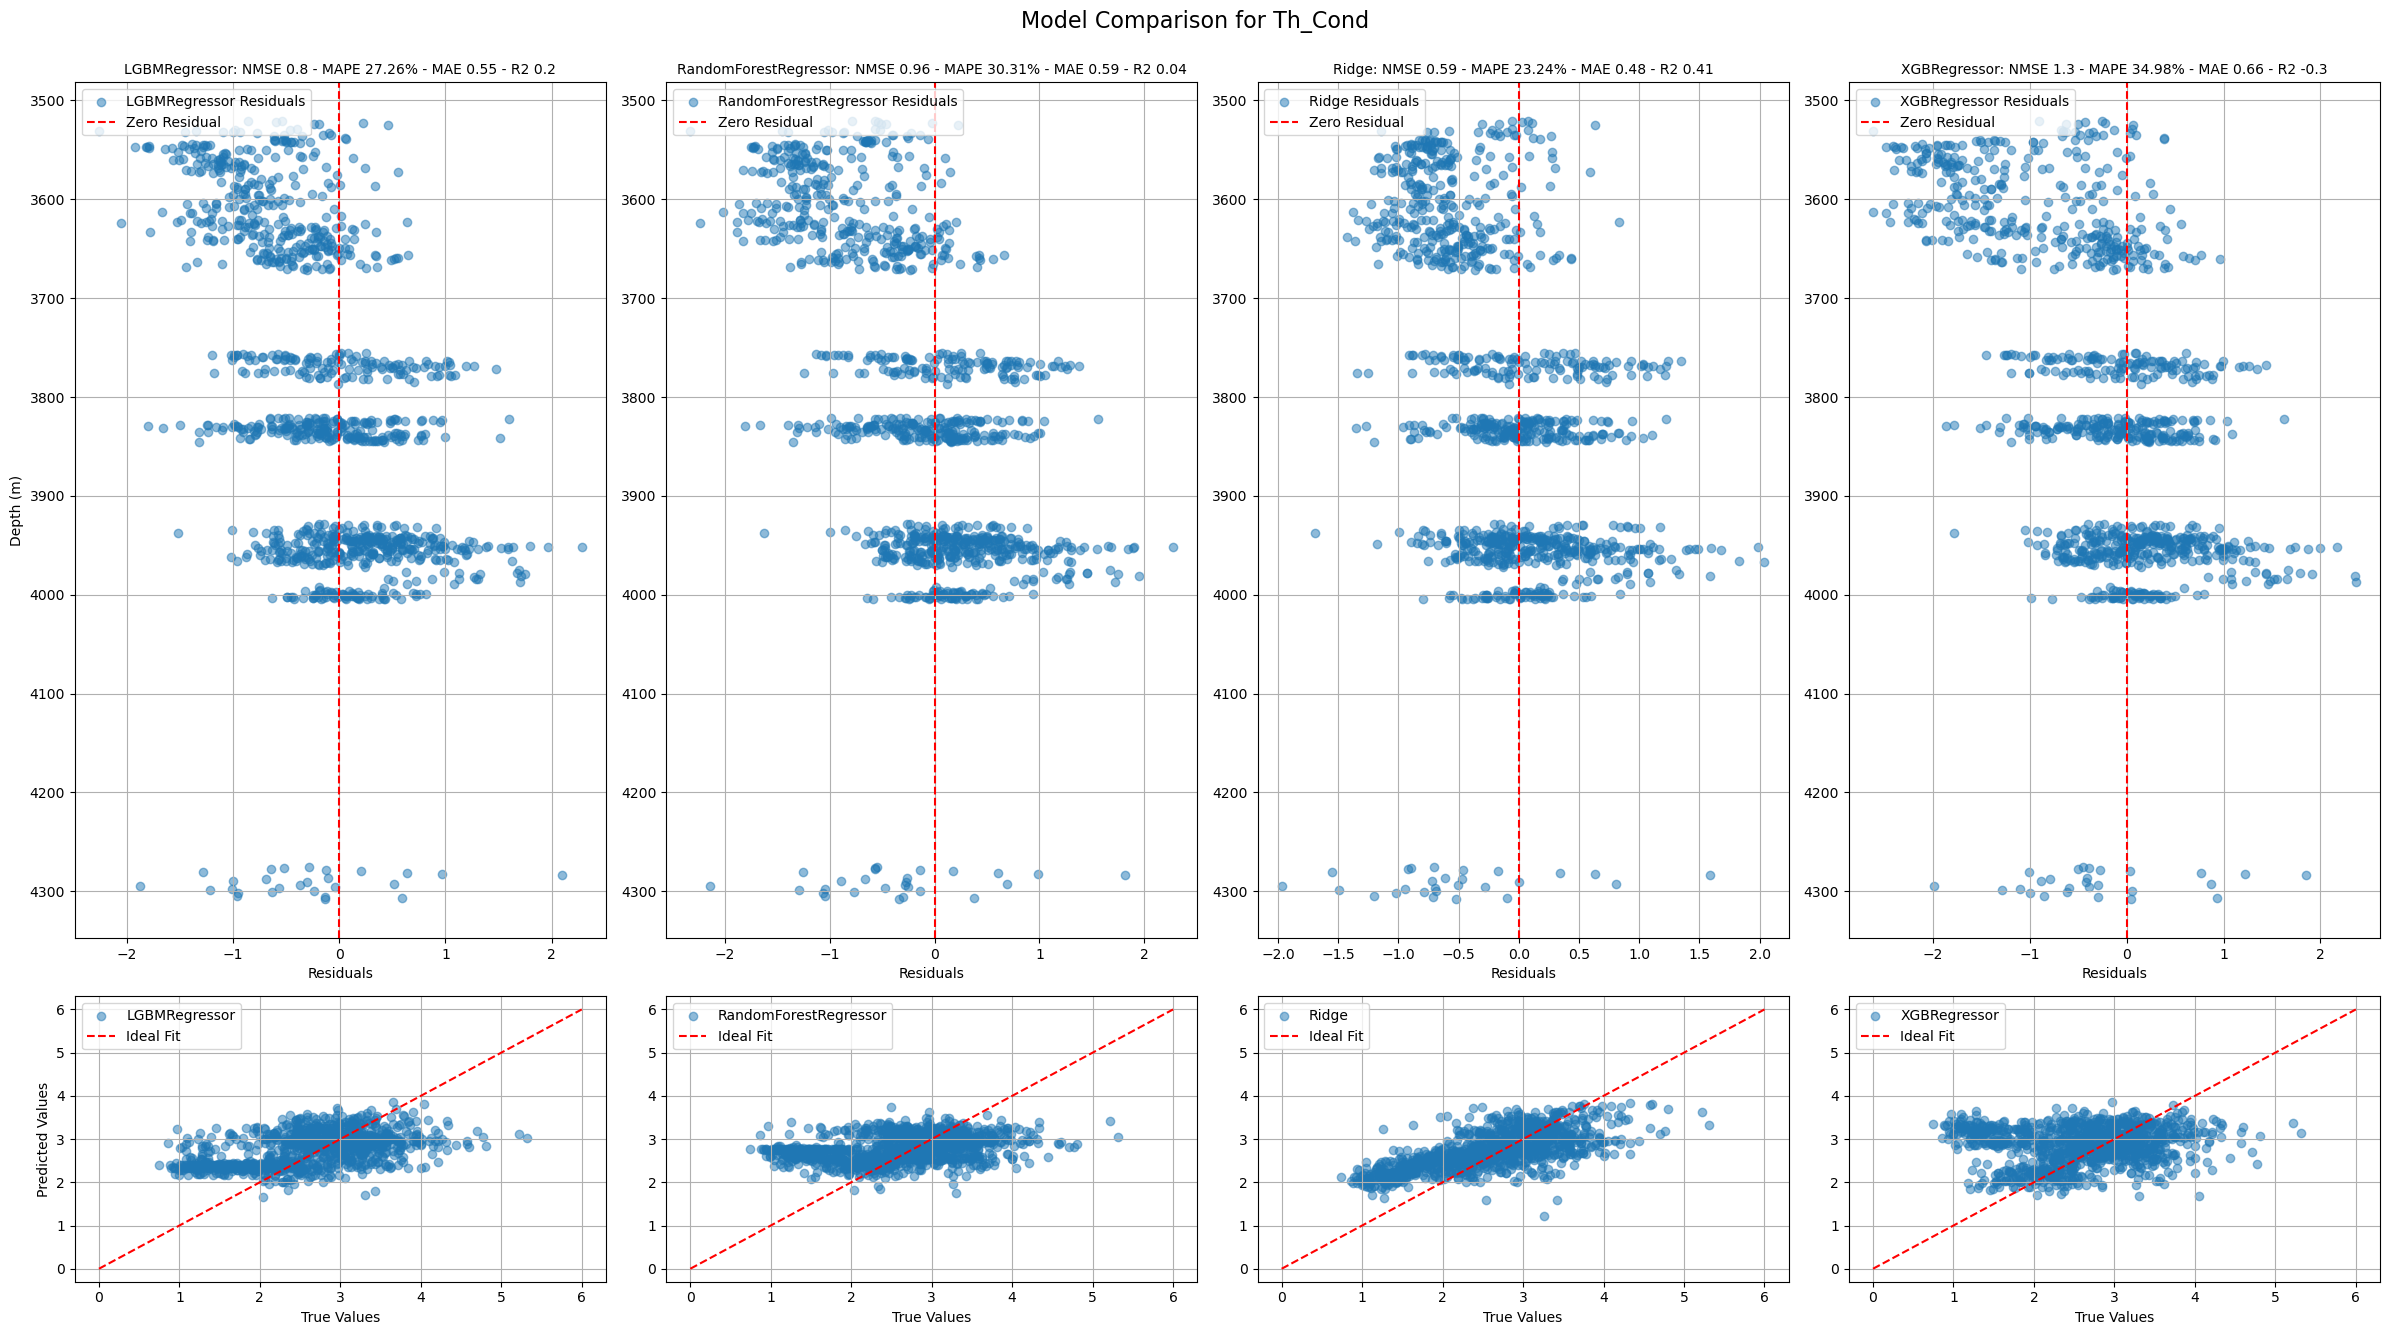

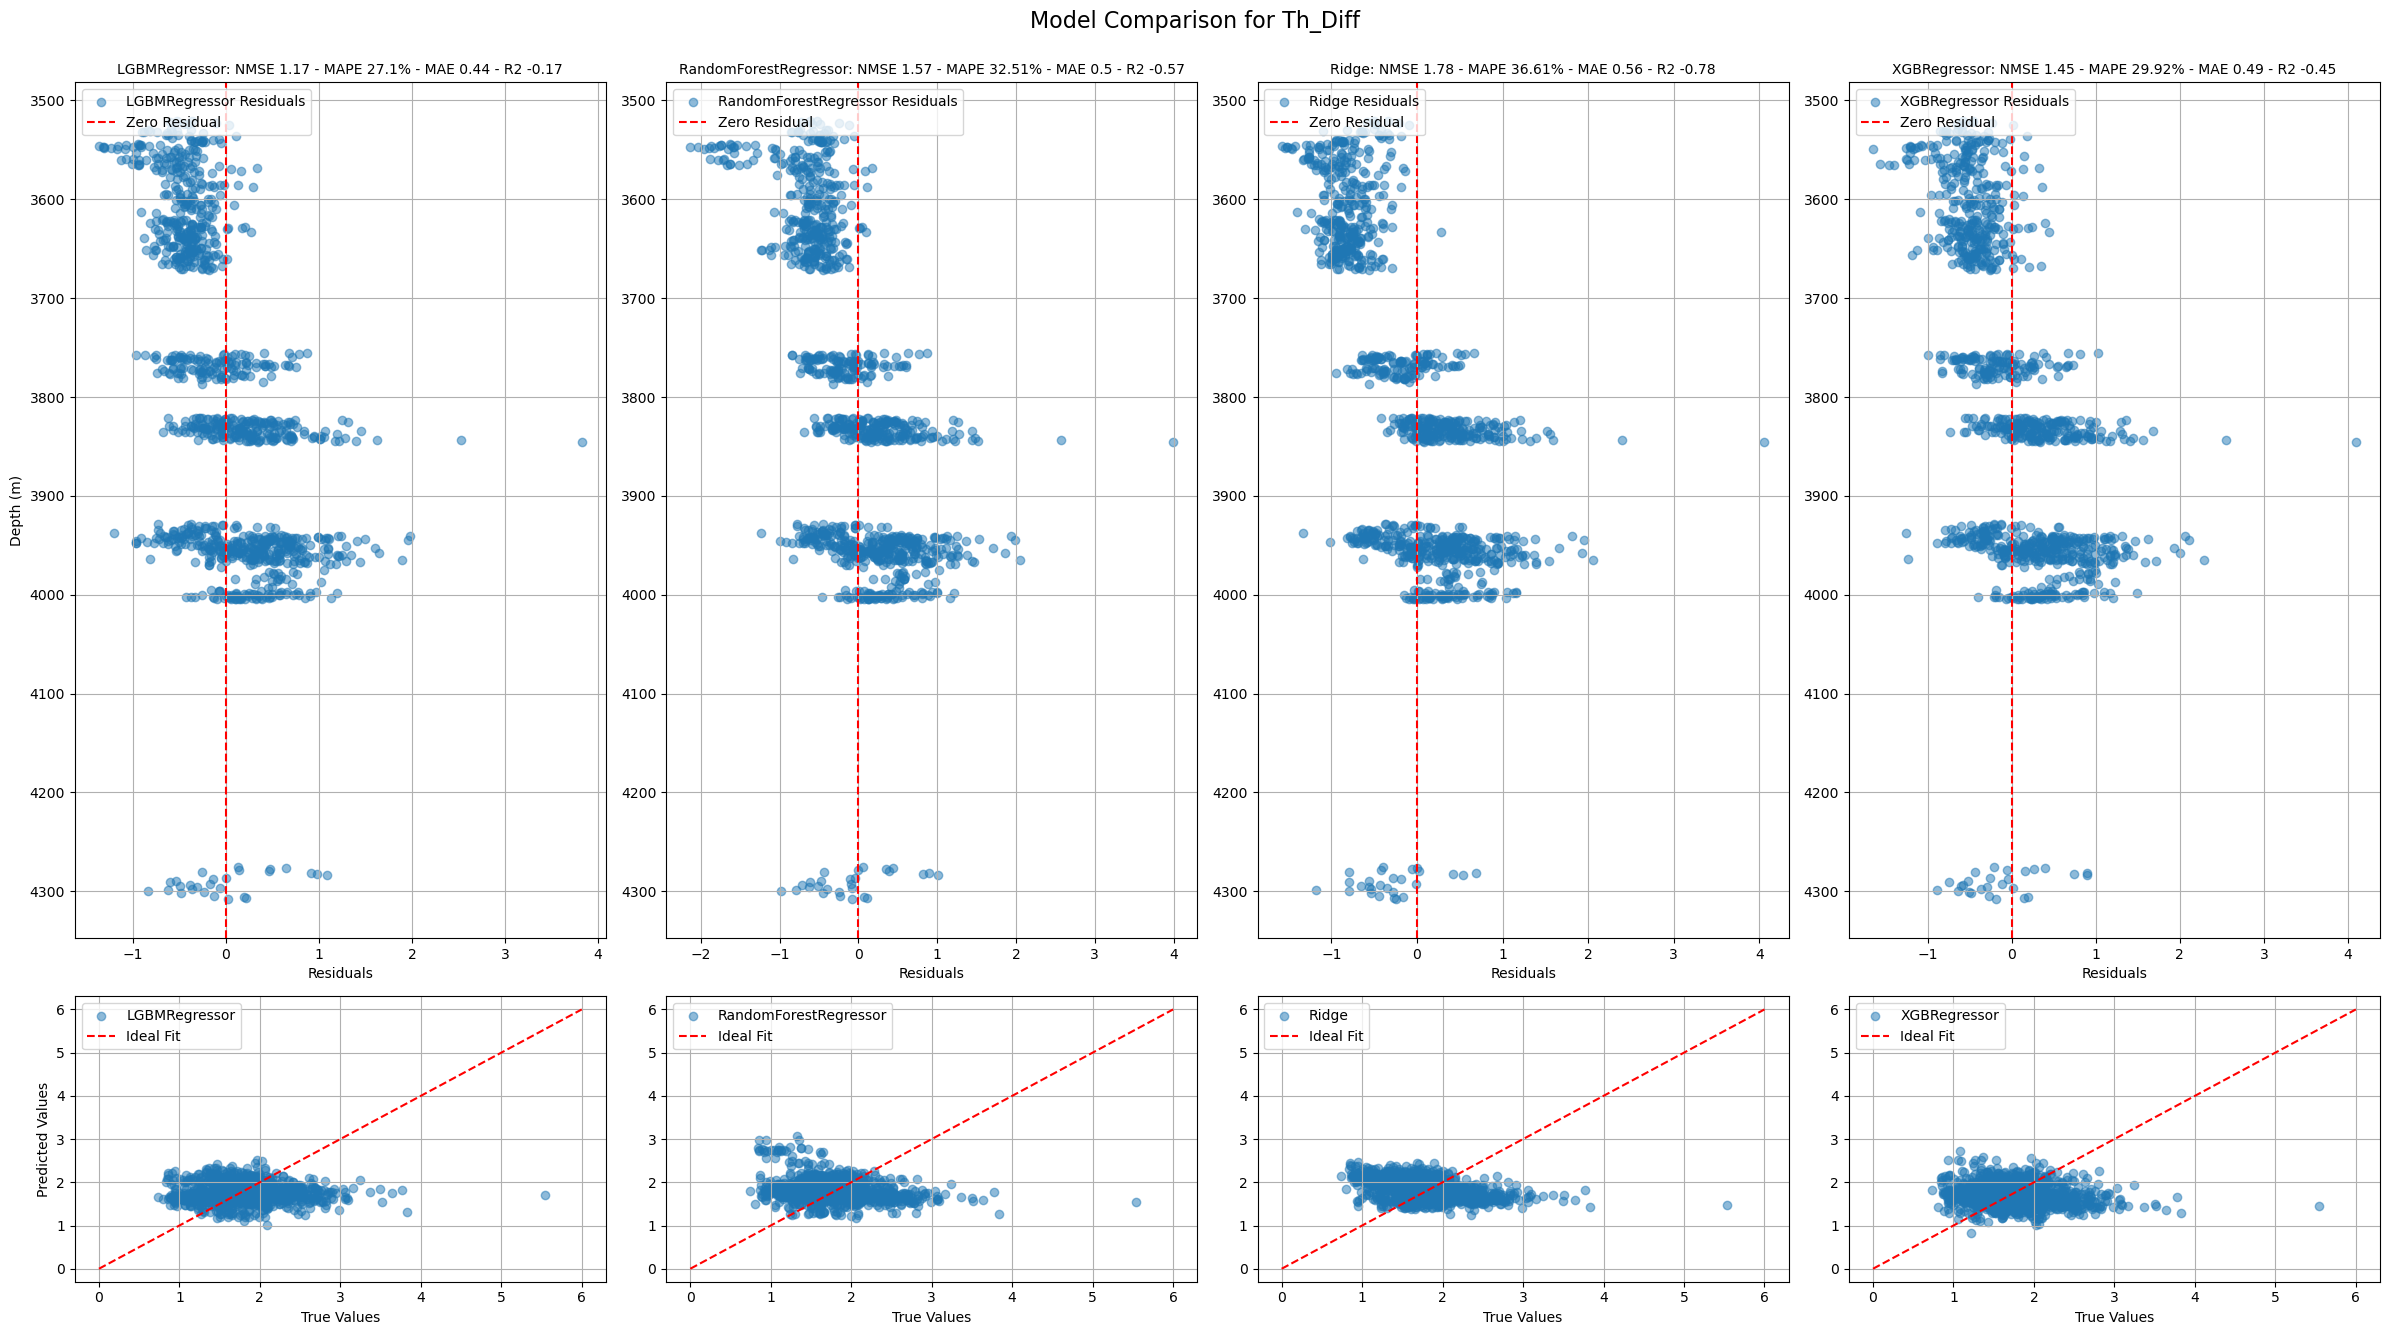

In [2]:
# Plot Model Comparison
framework.plot_model_comparison(results_df)

Well: E18-05


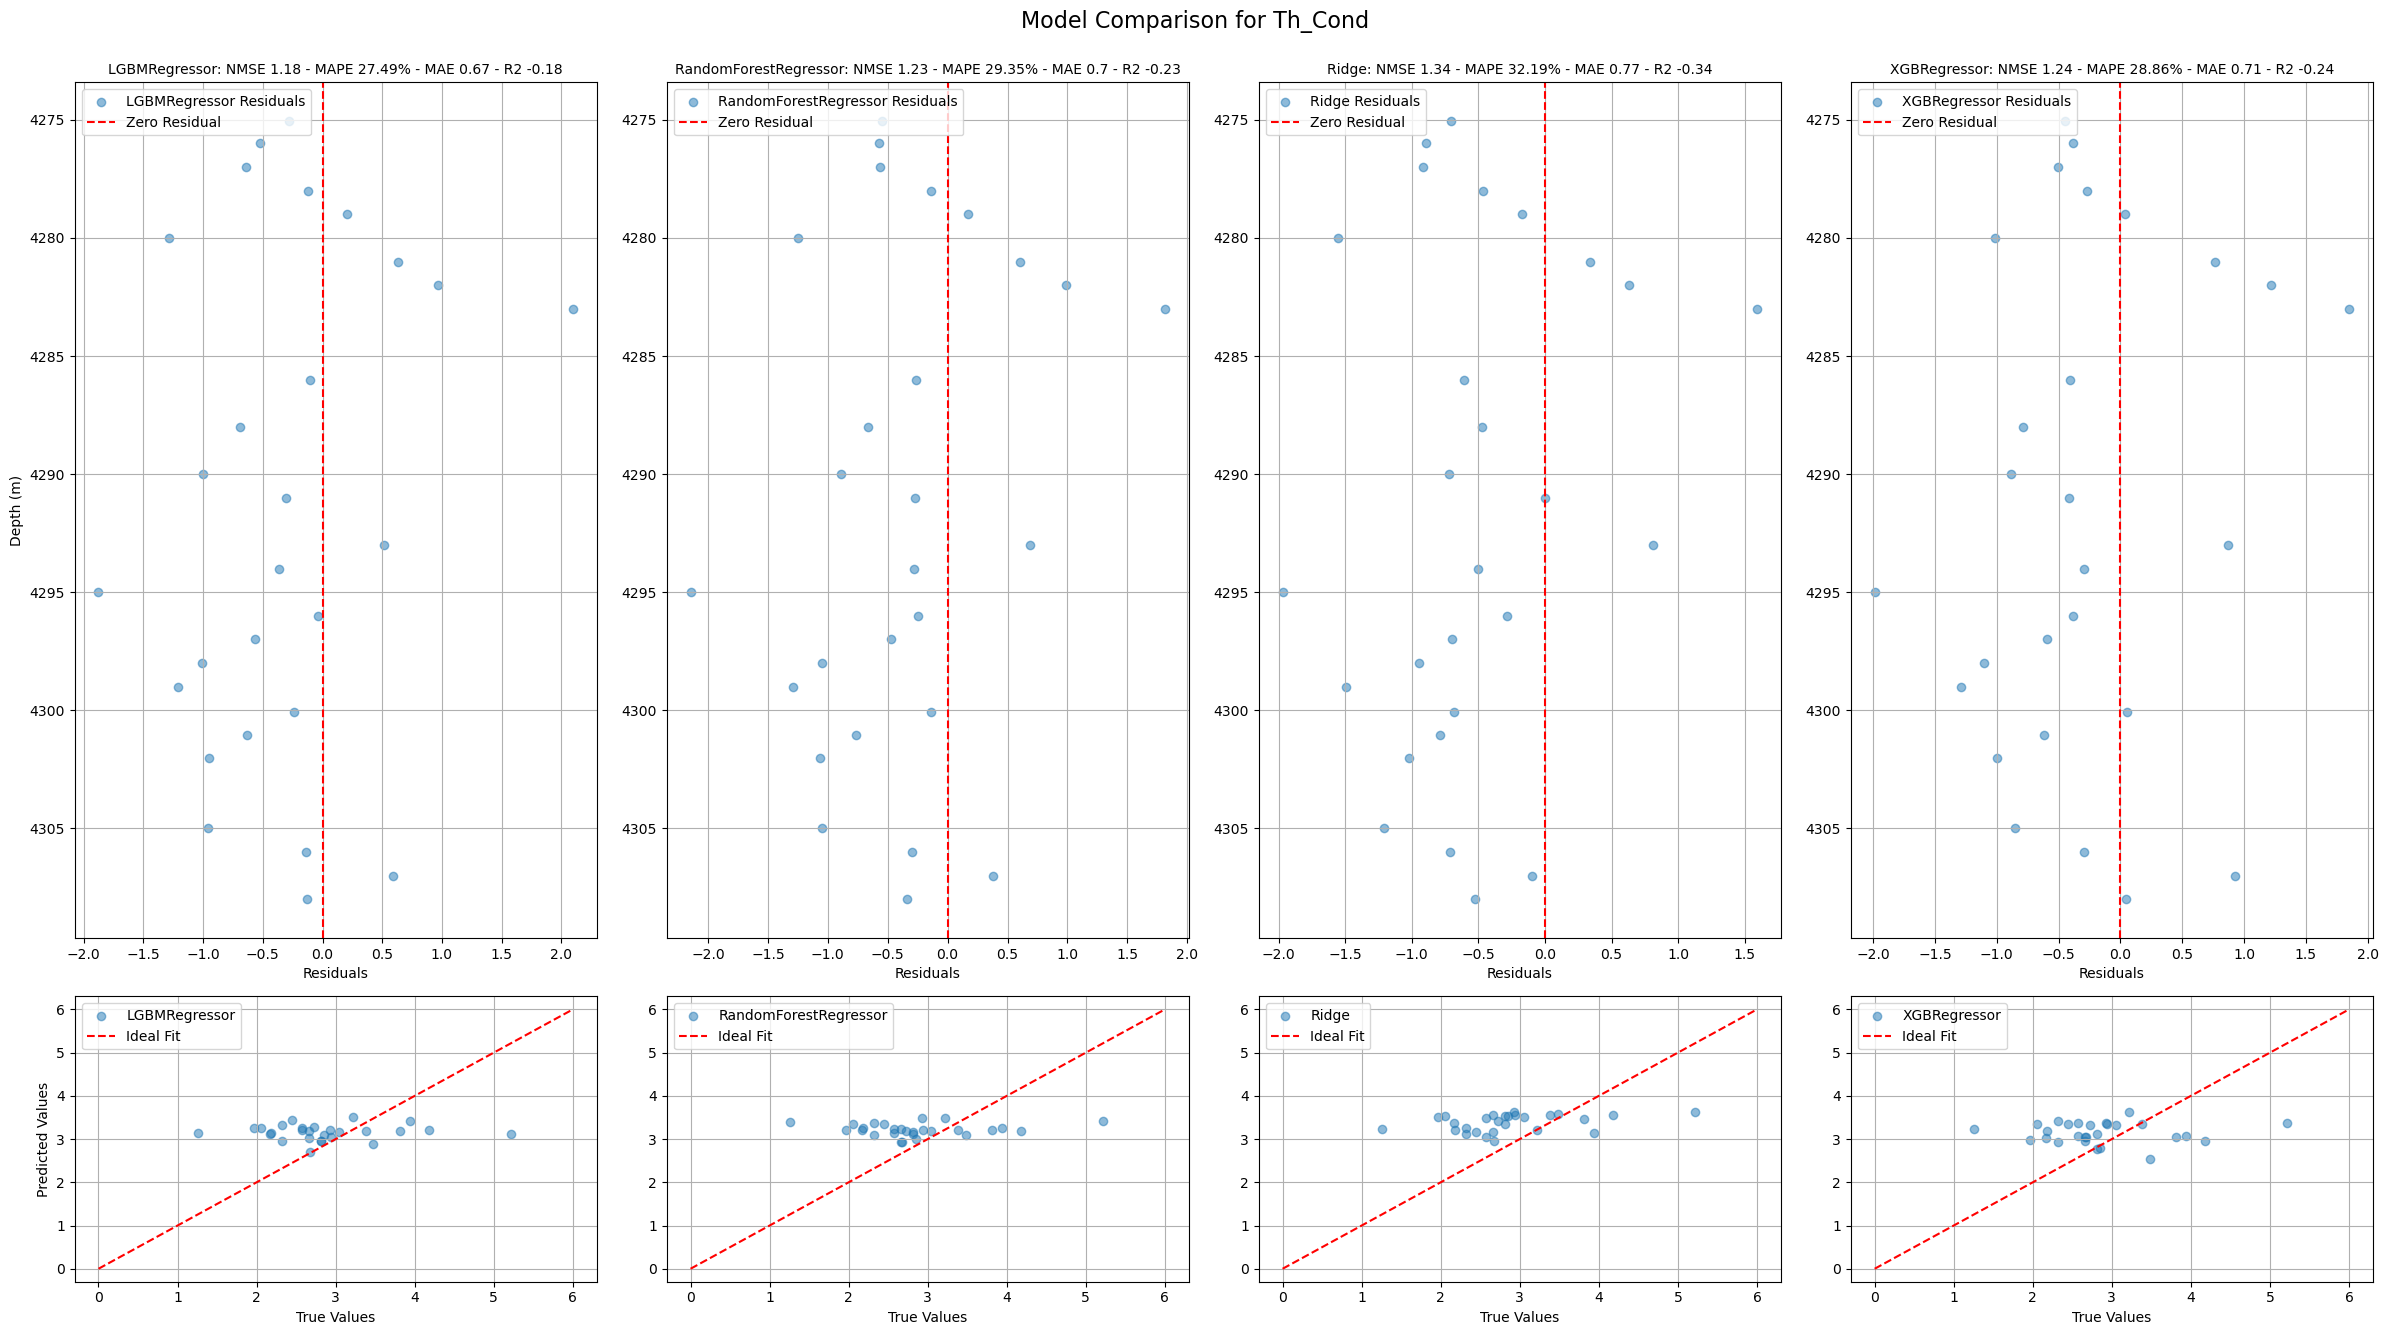

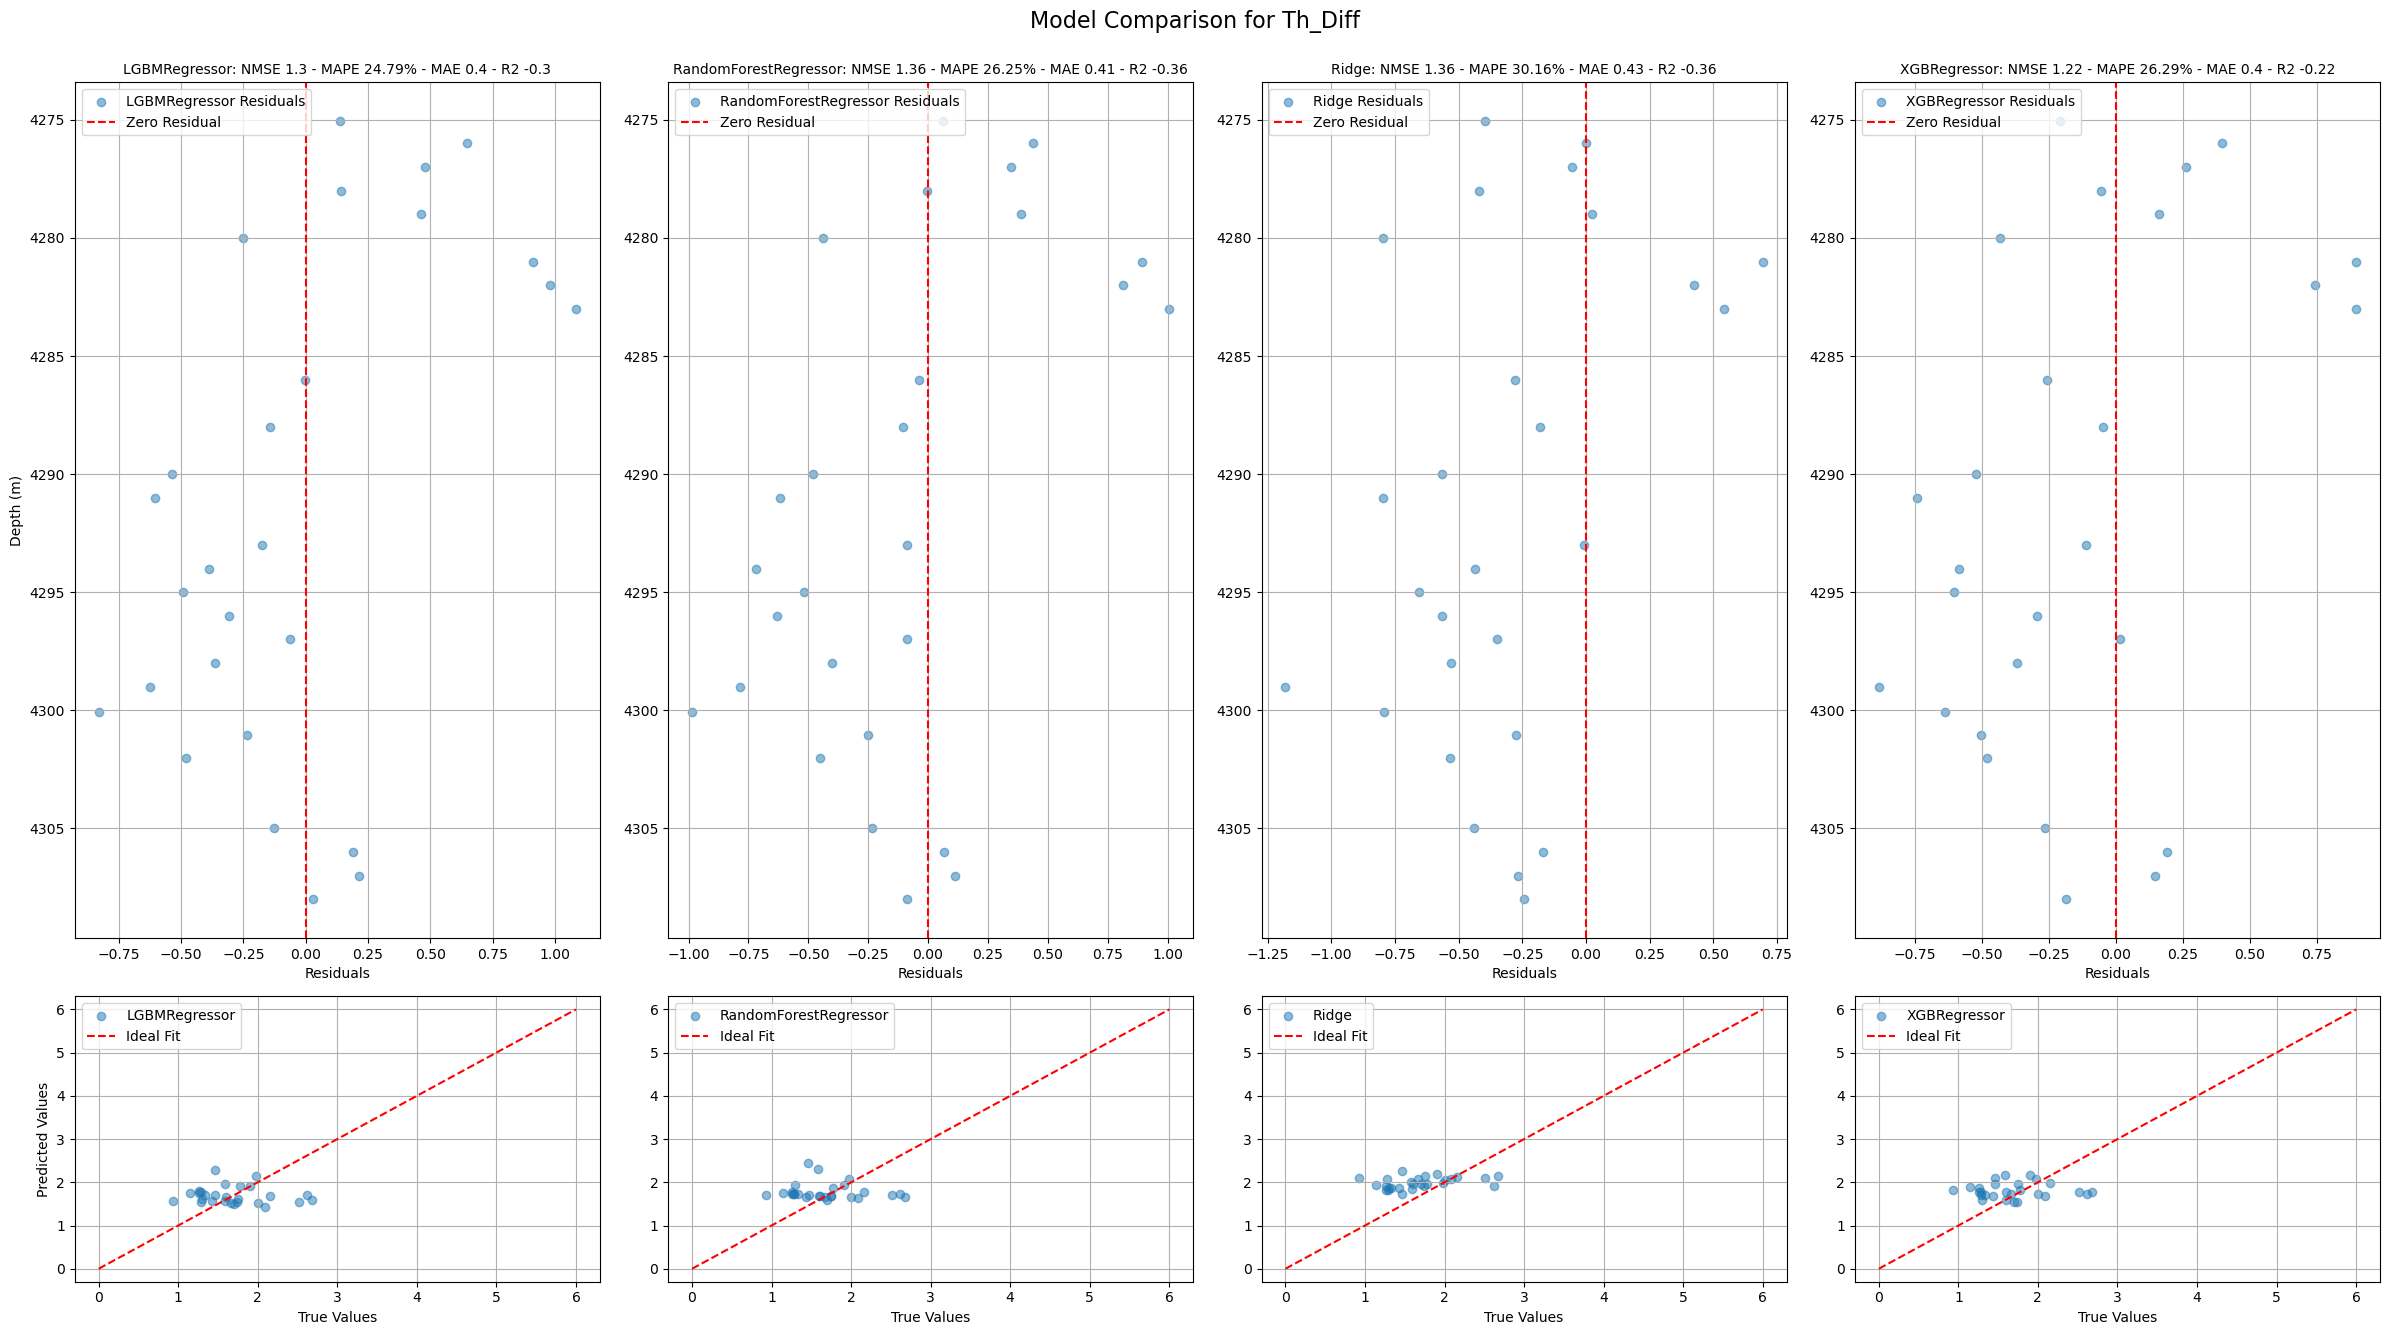

Well: K18-07x


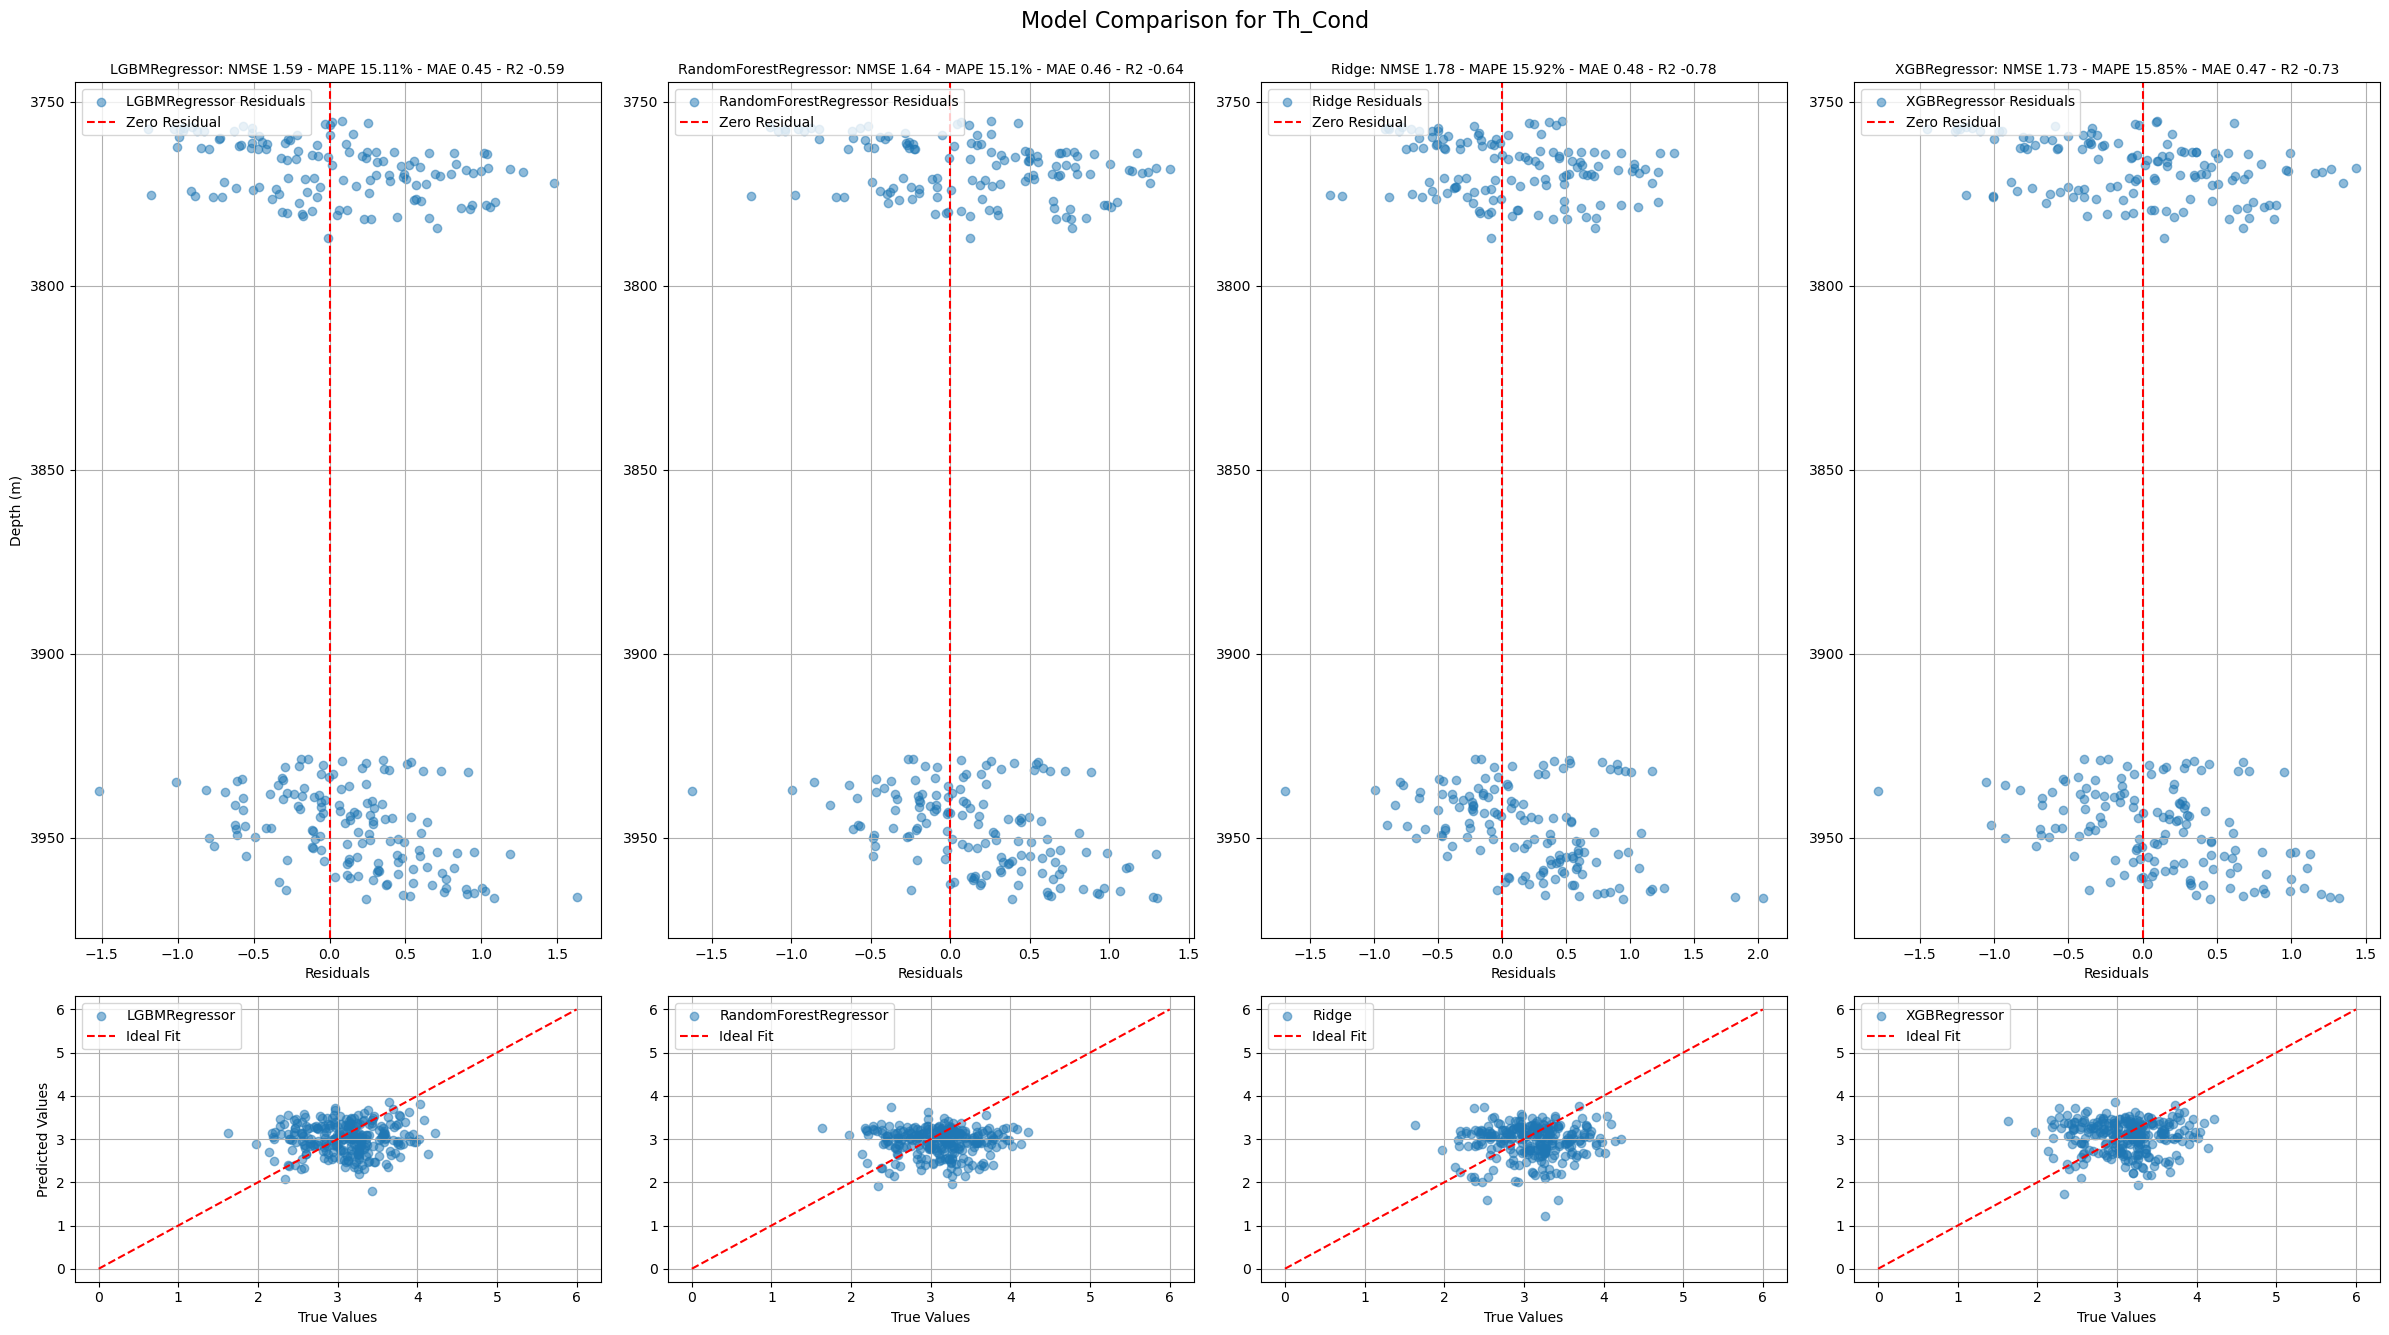

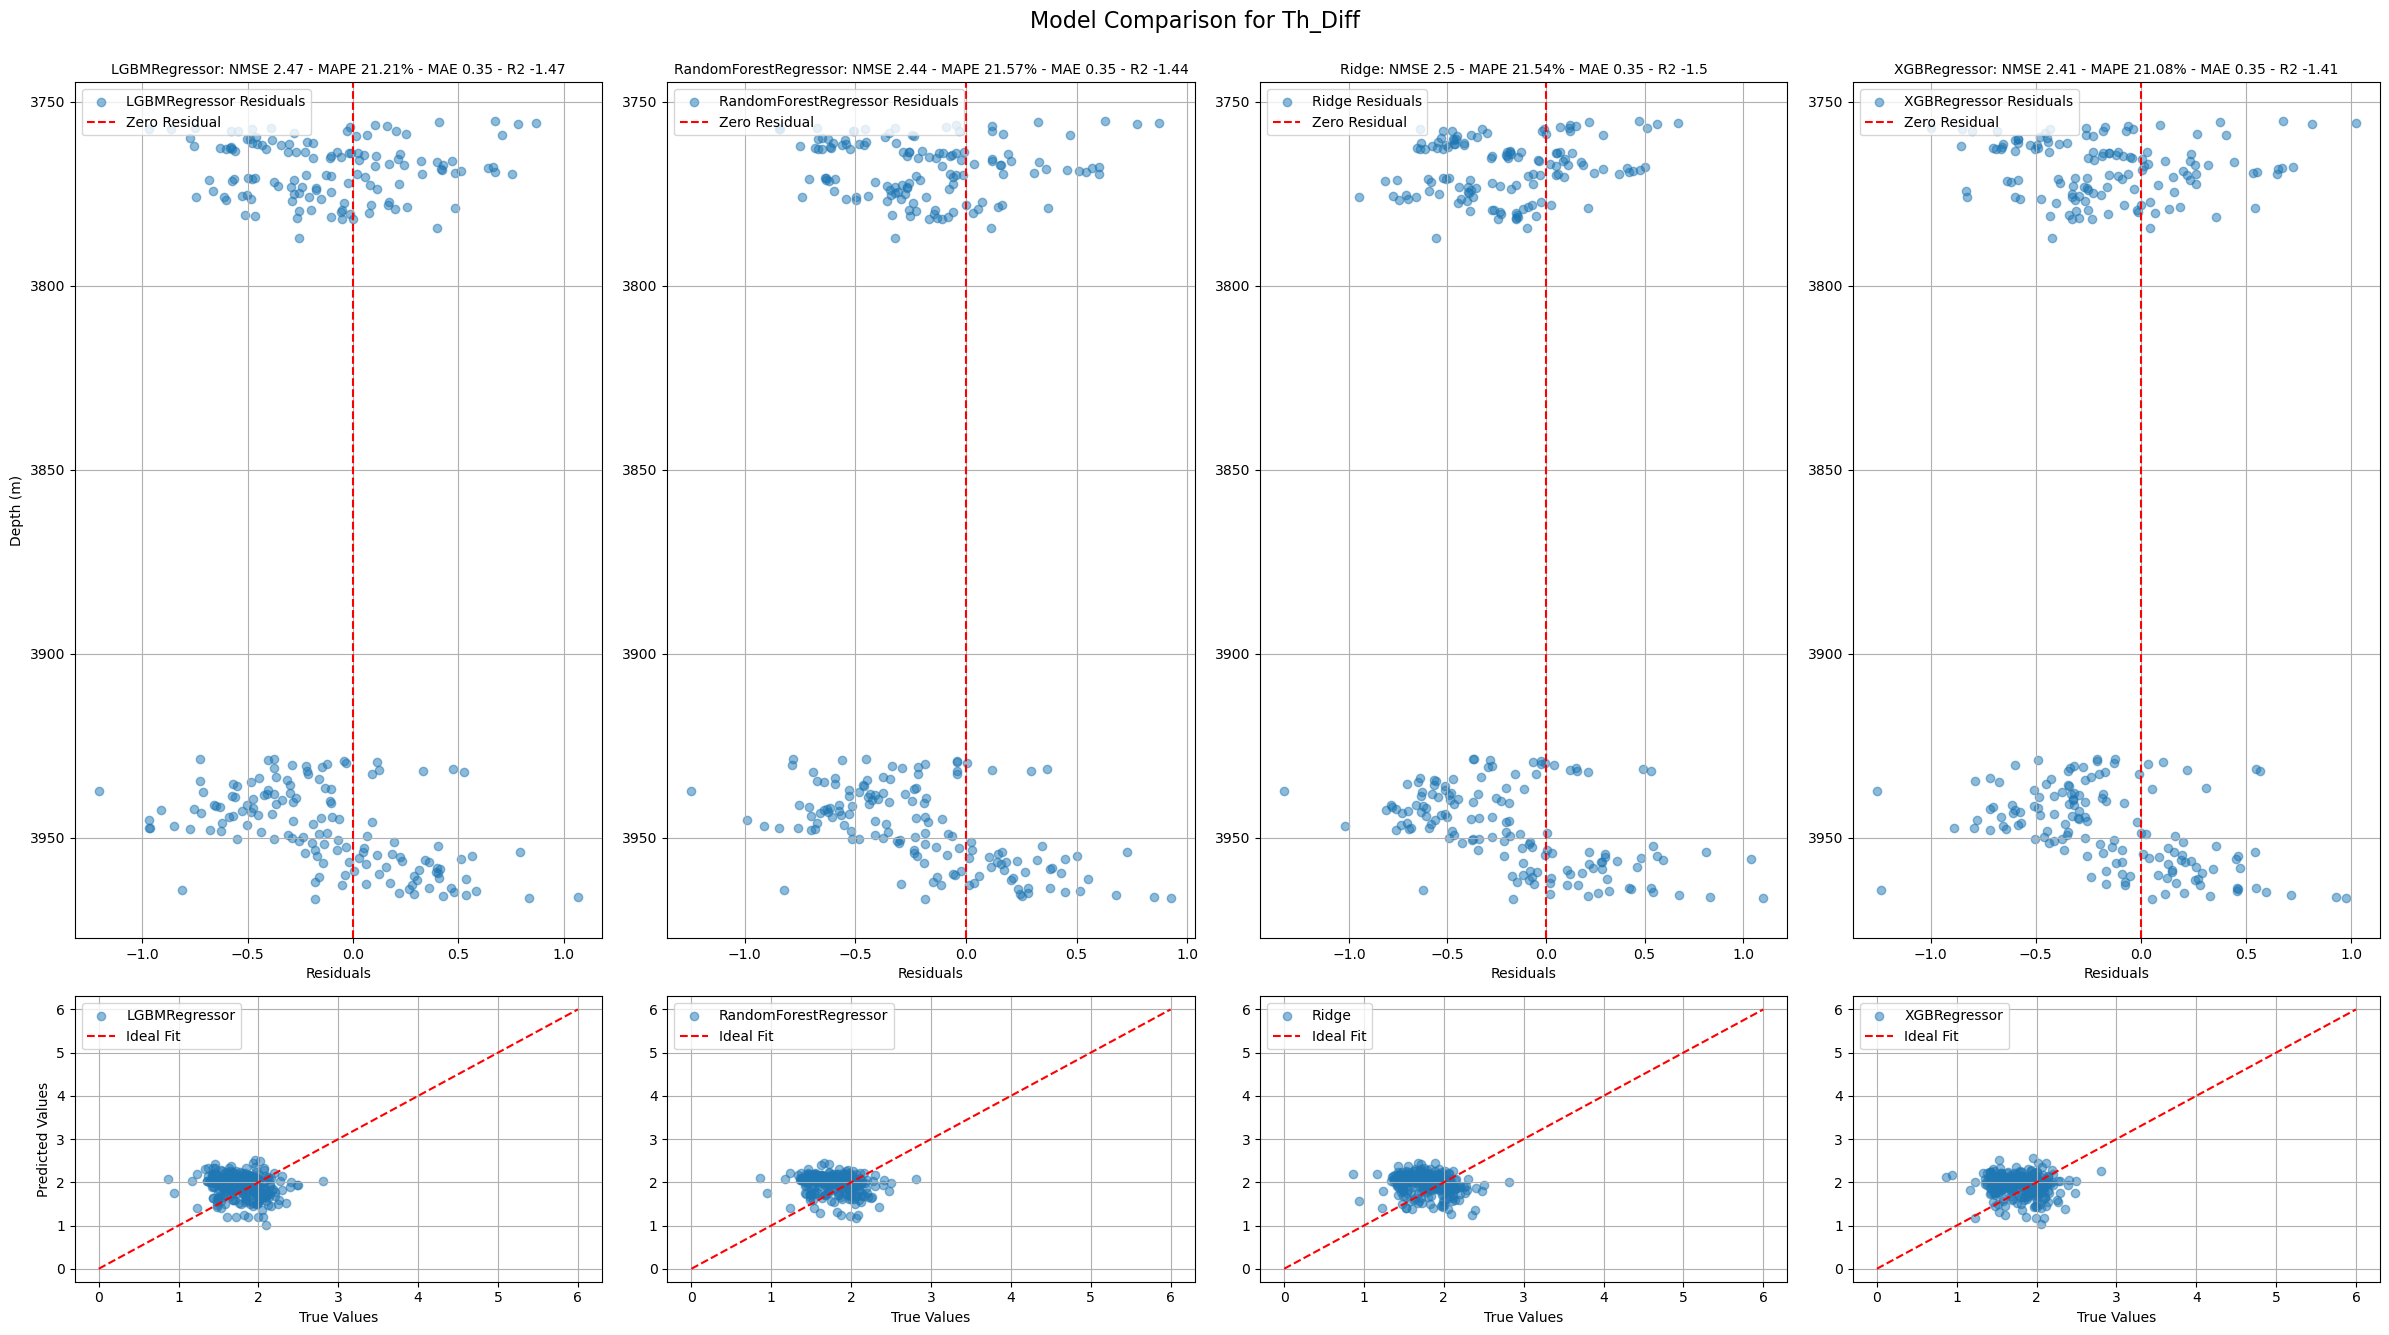

Well: K18-08


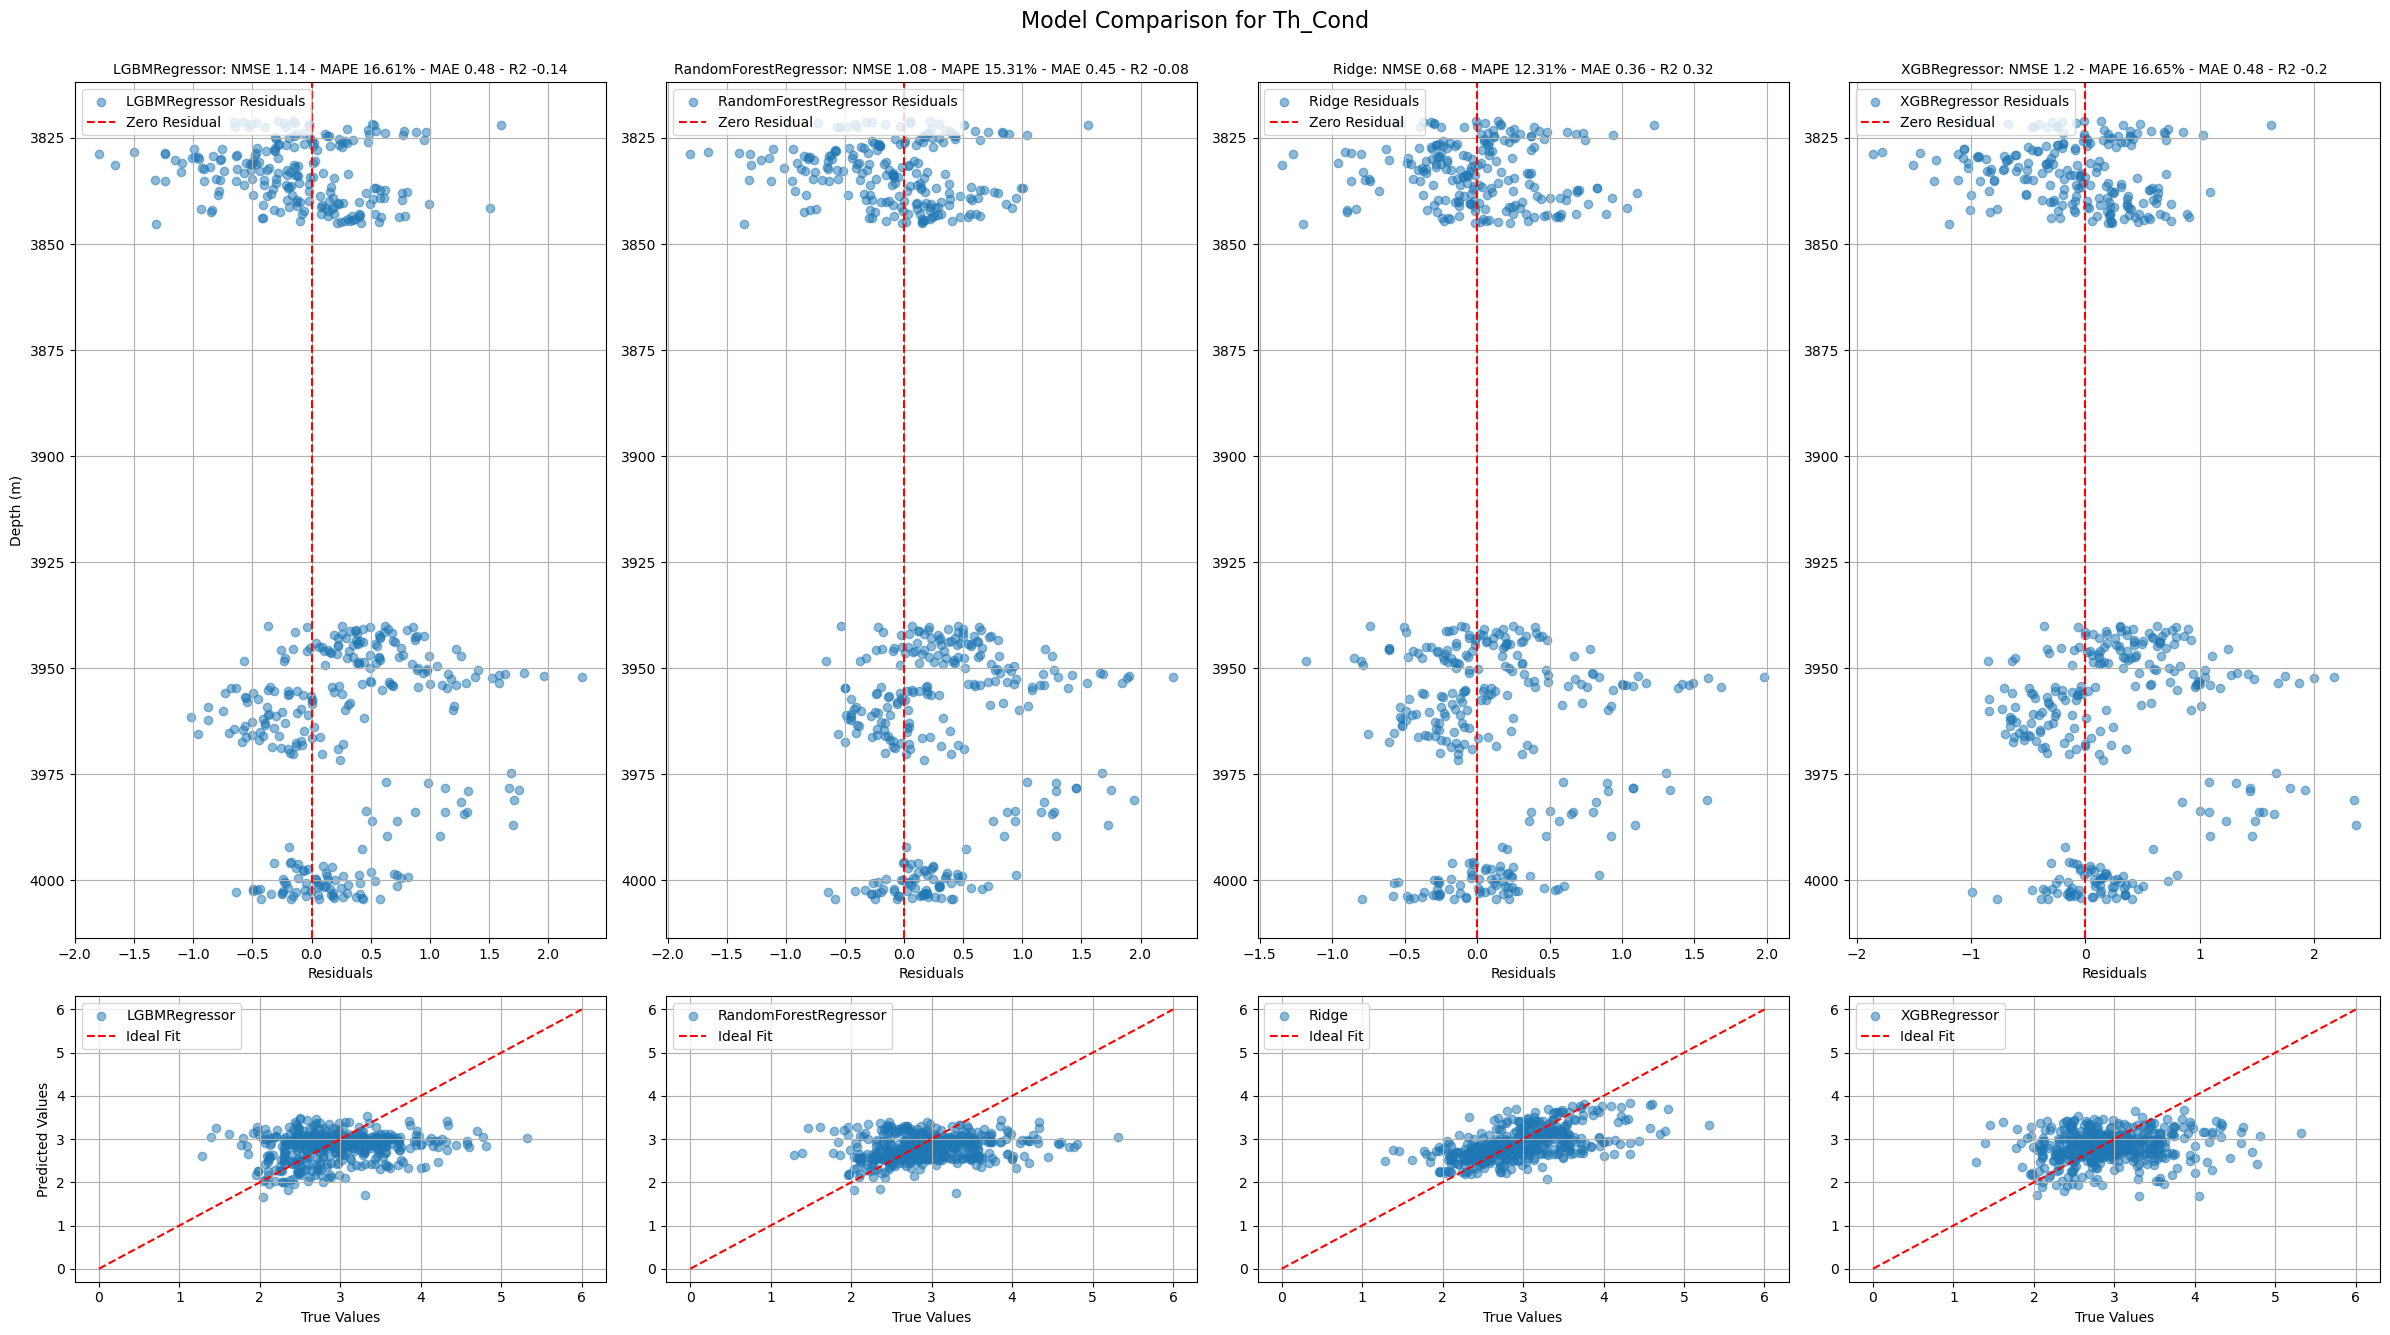

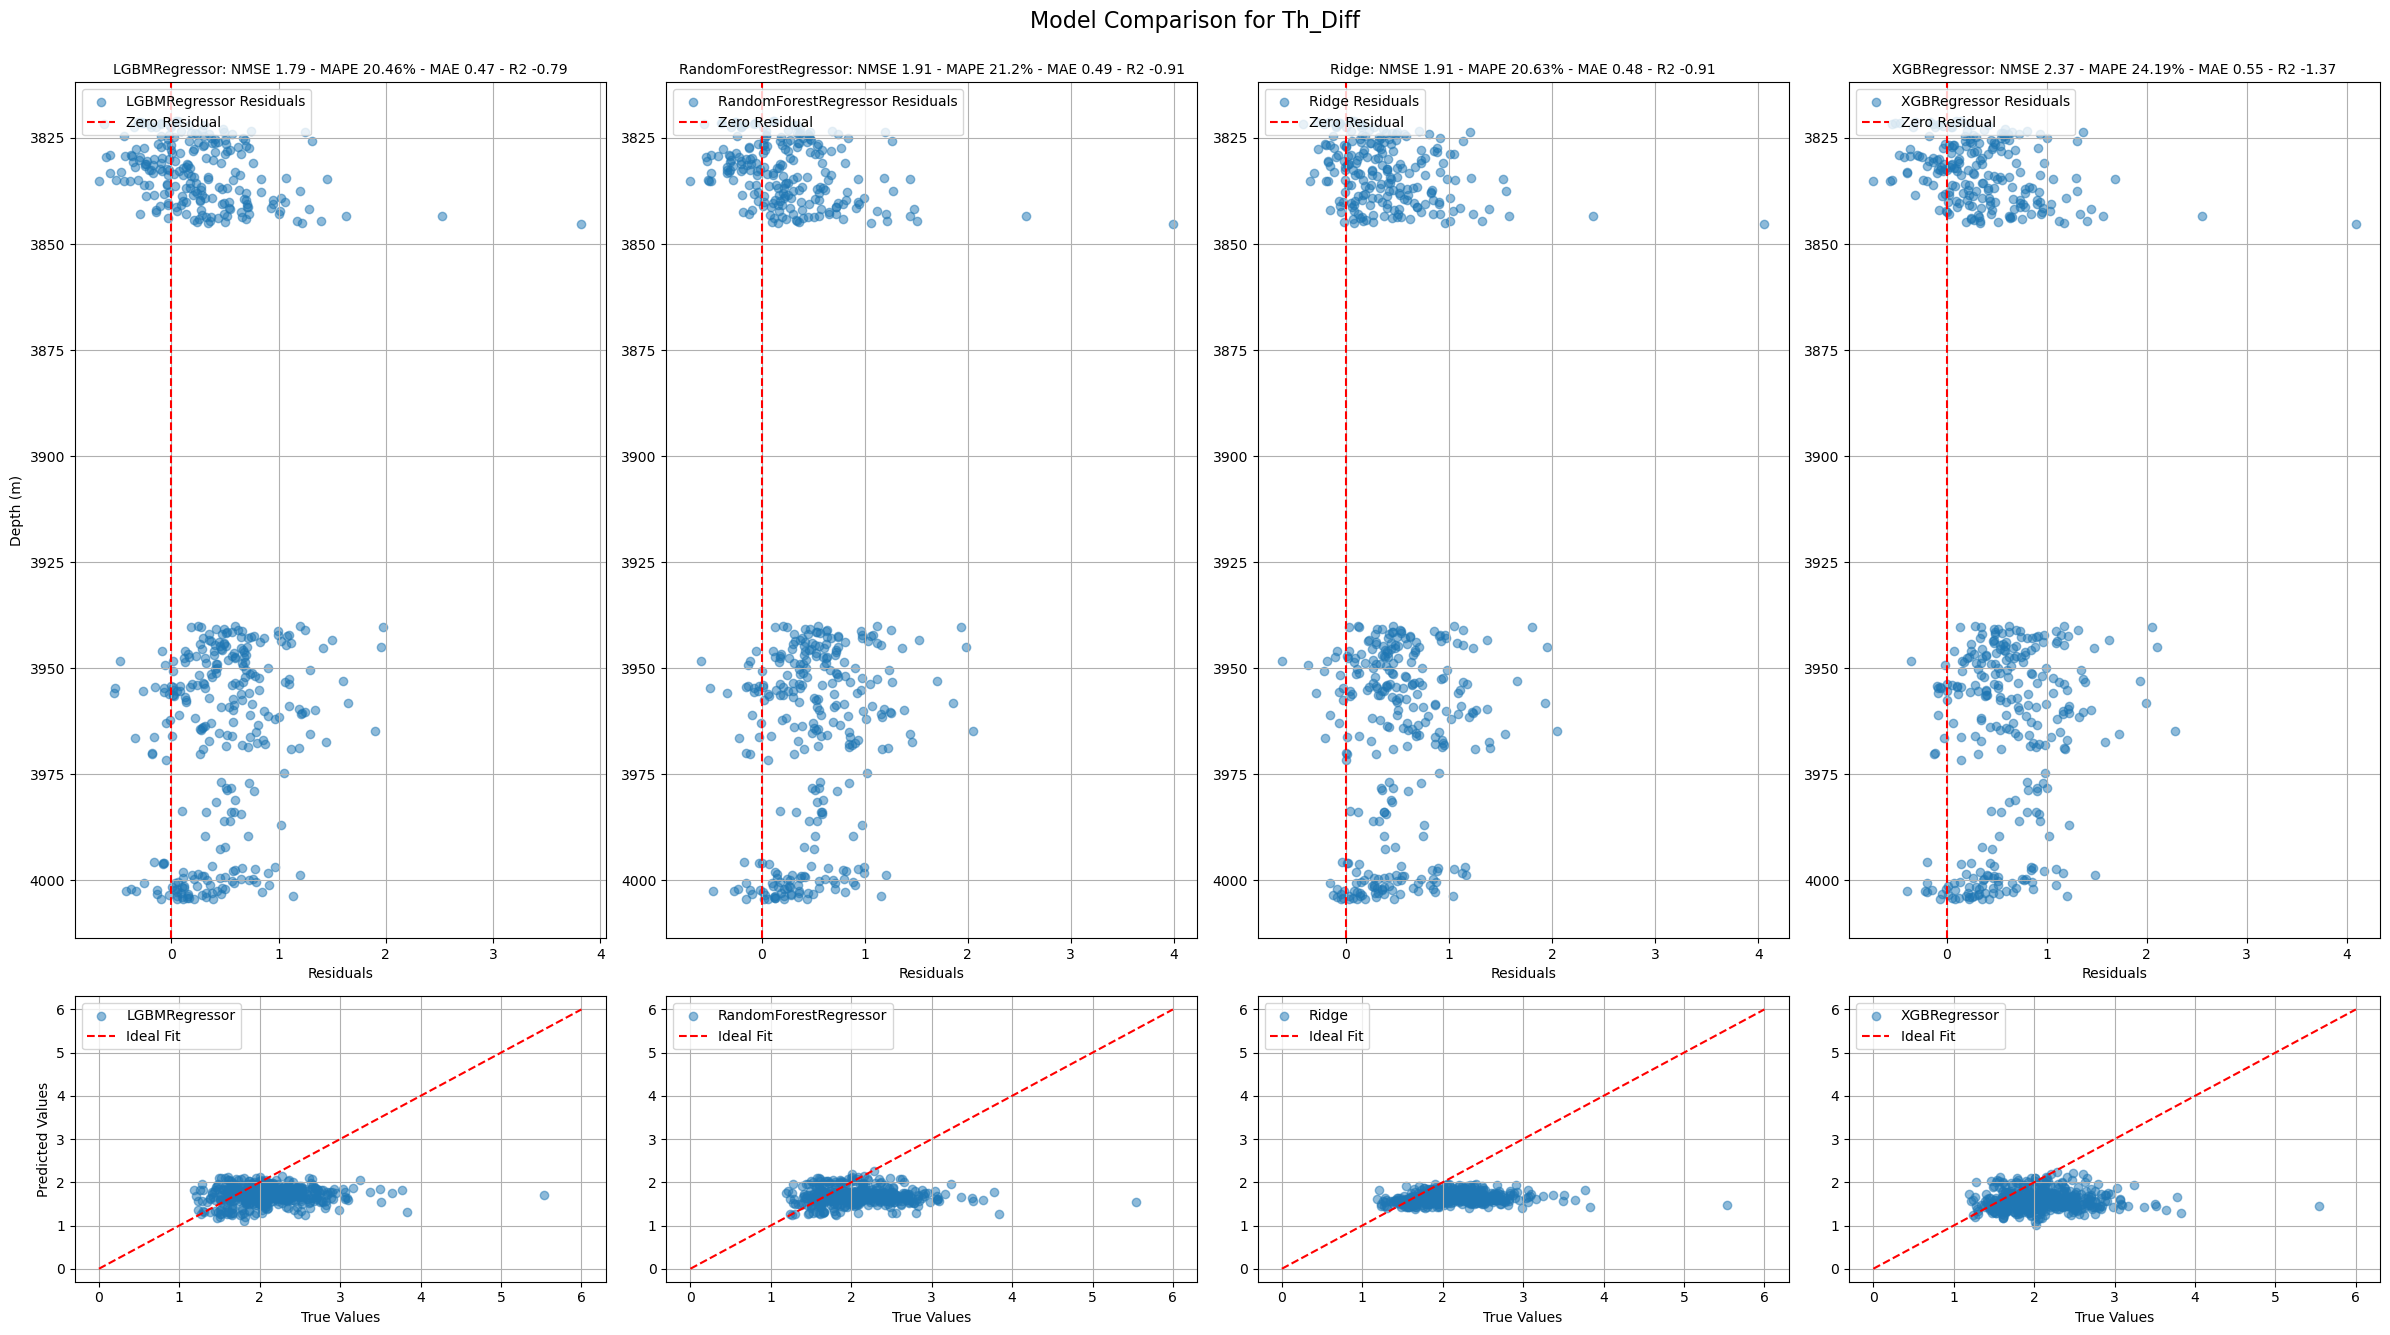

Well: ZRP-03a


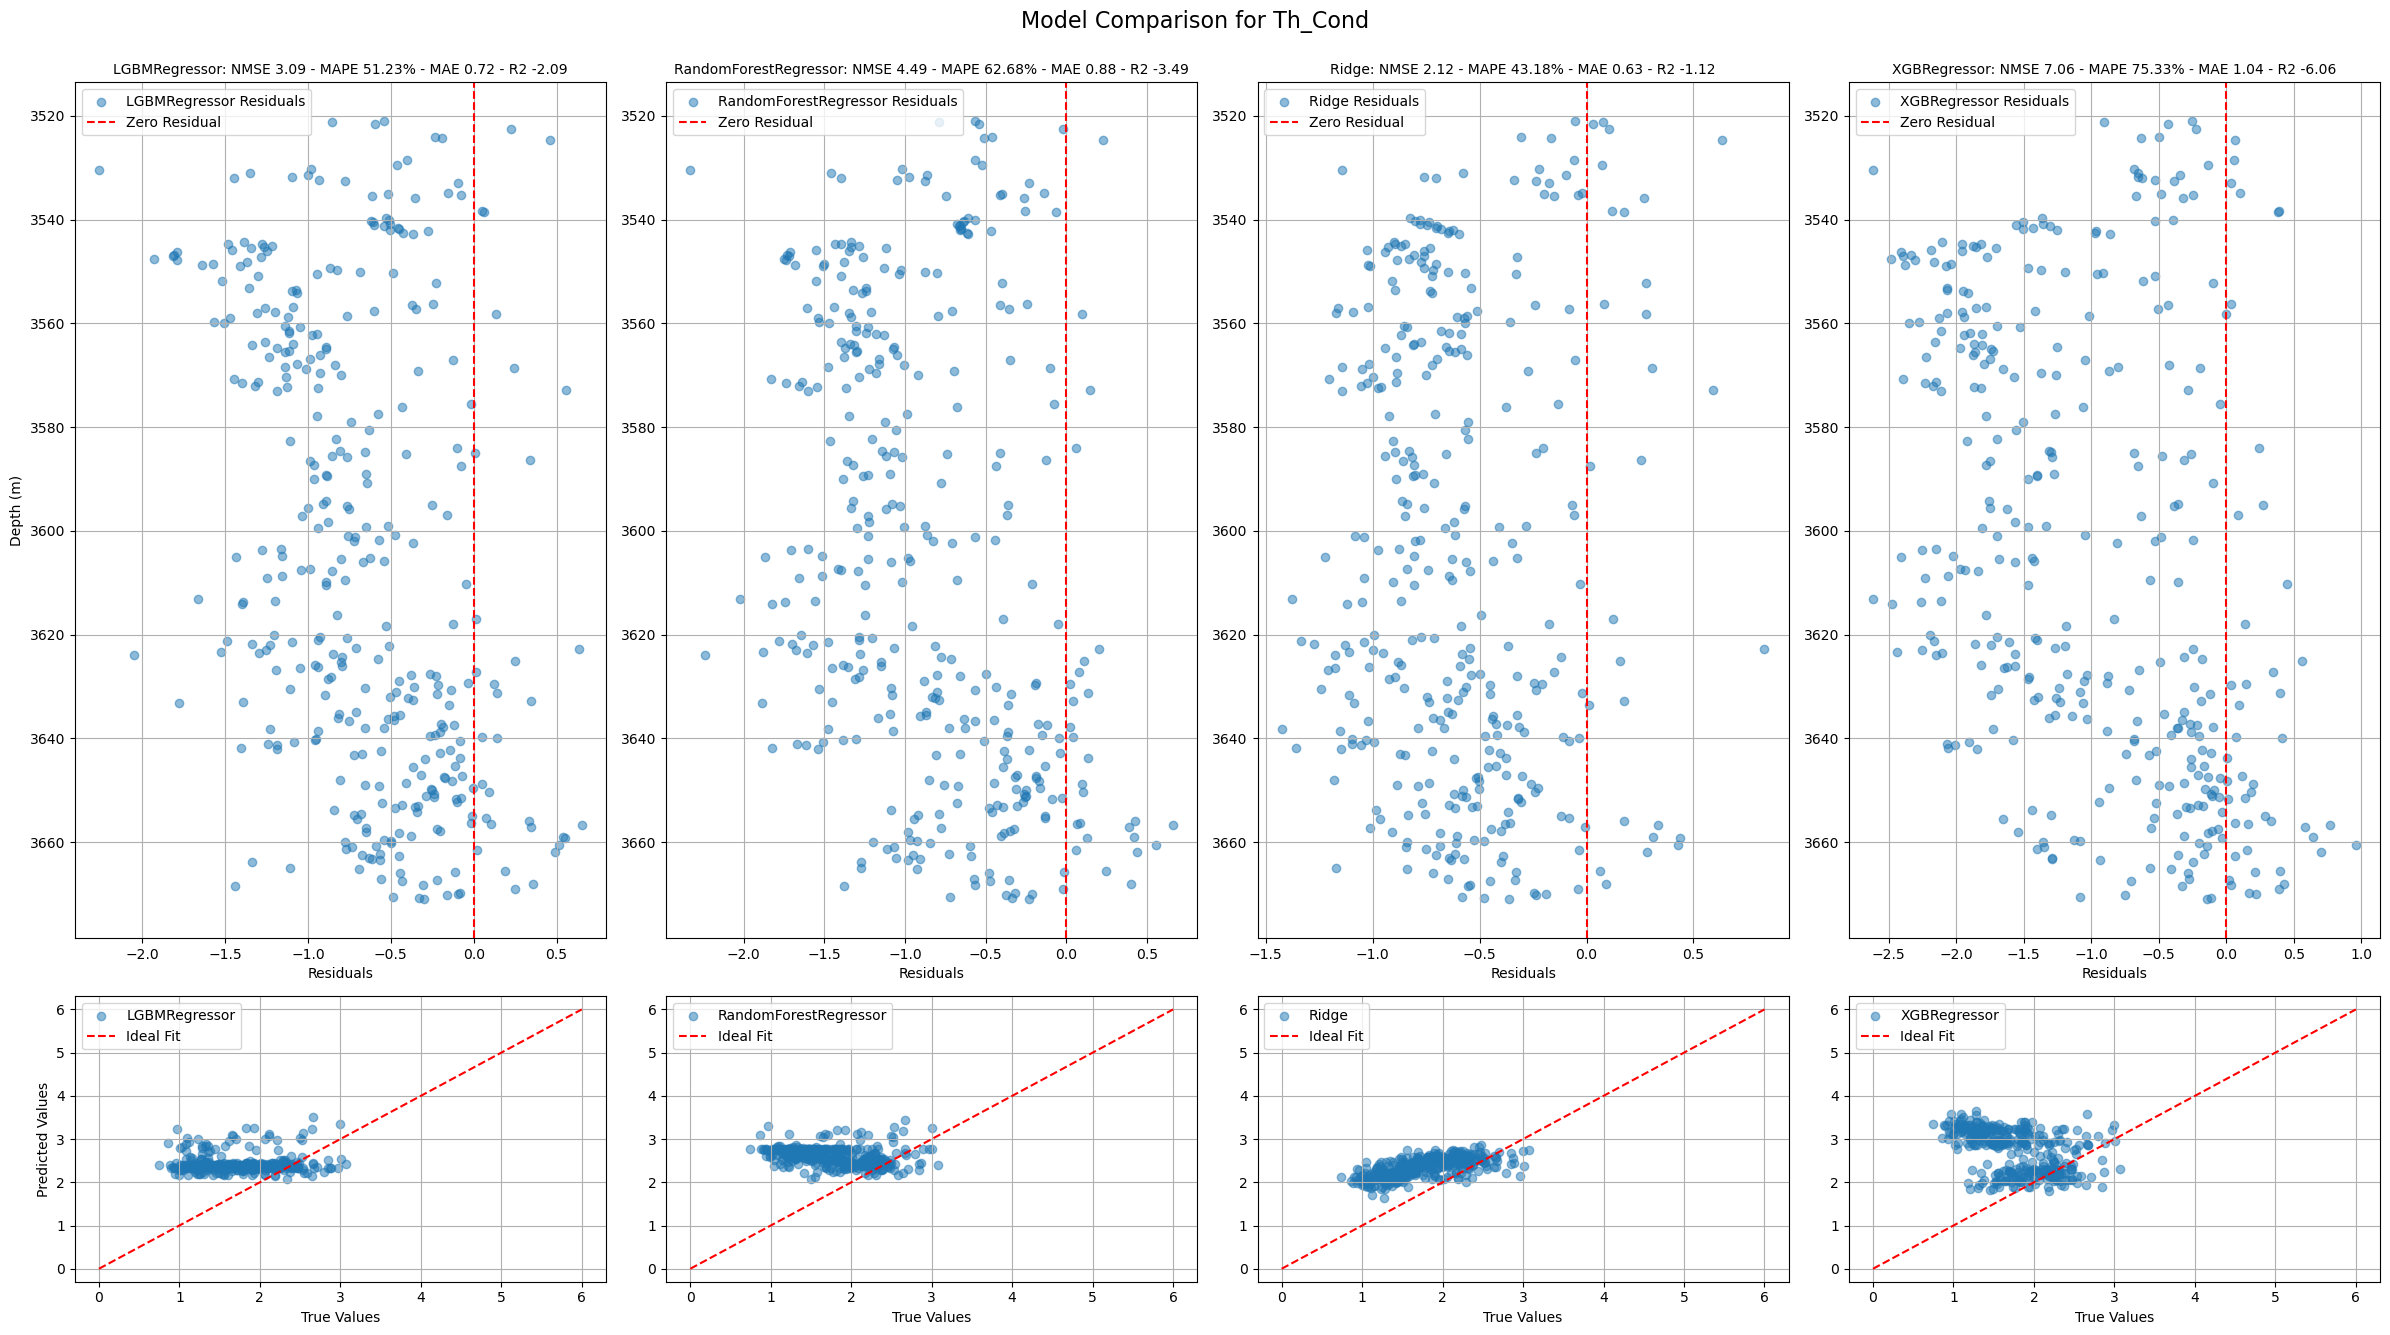

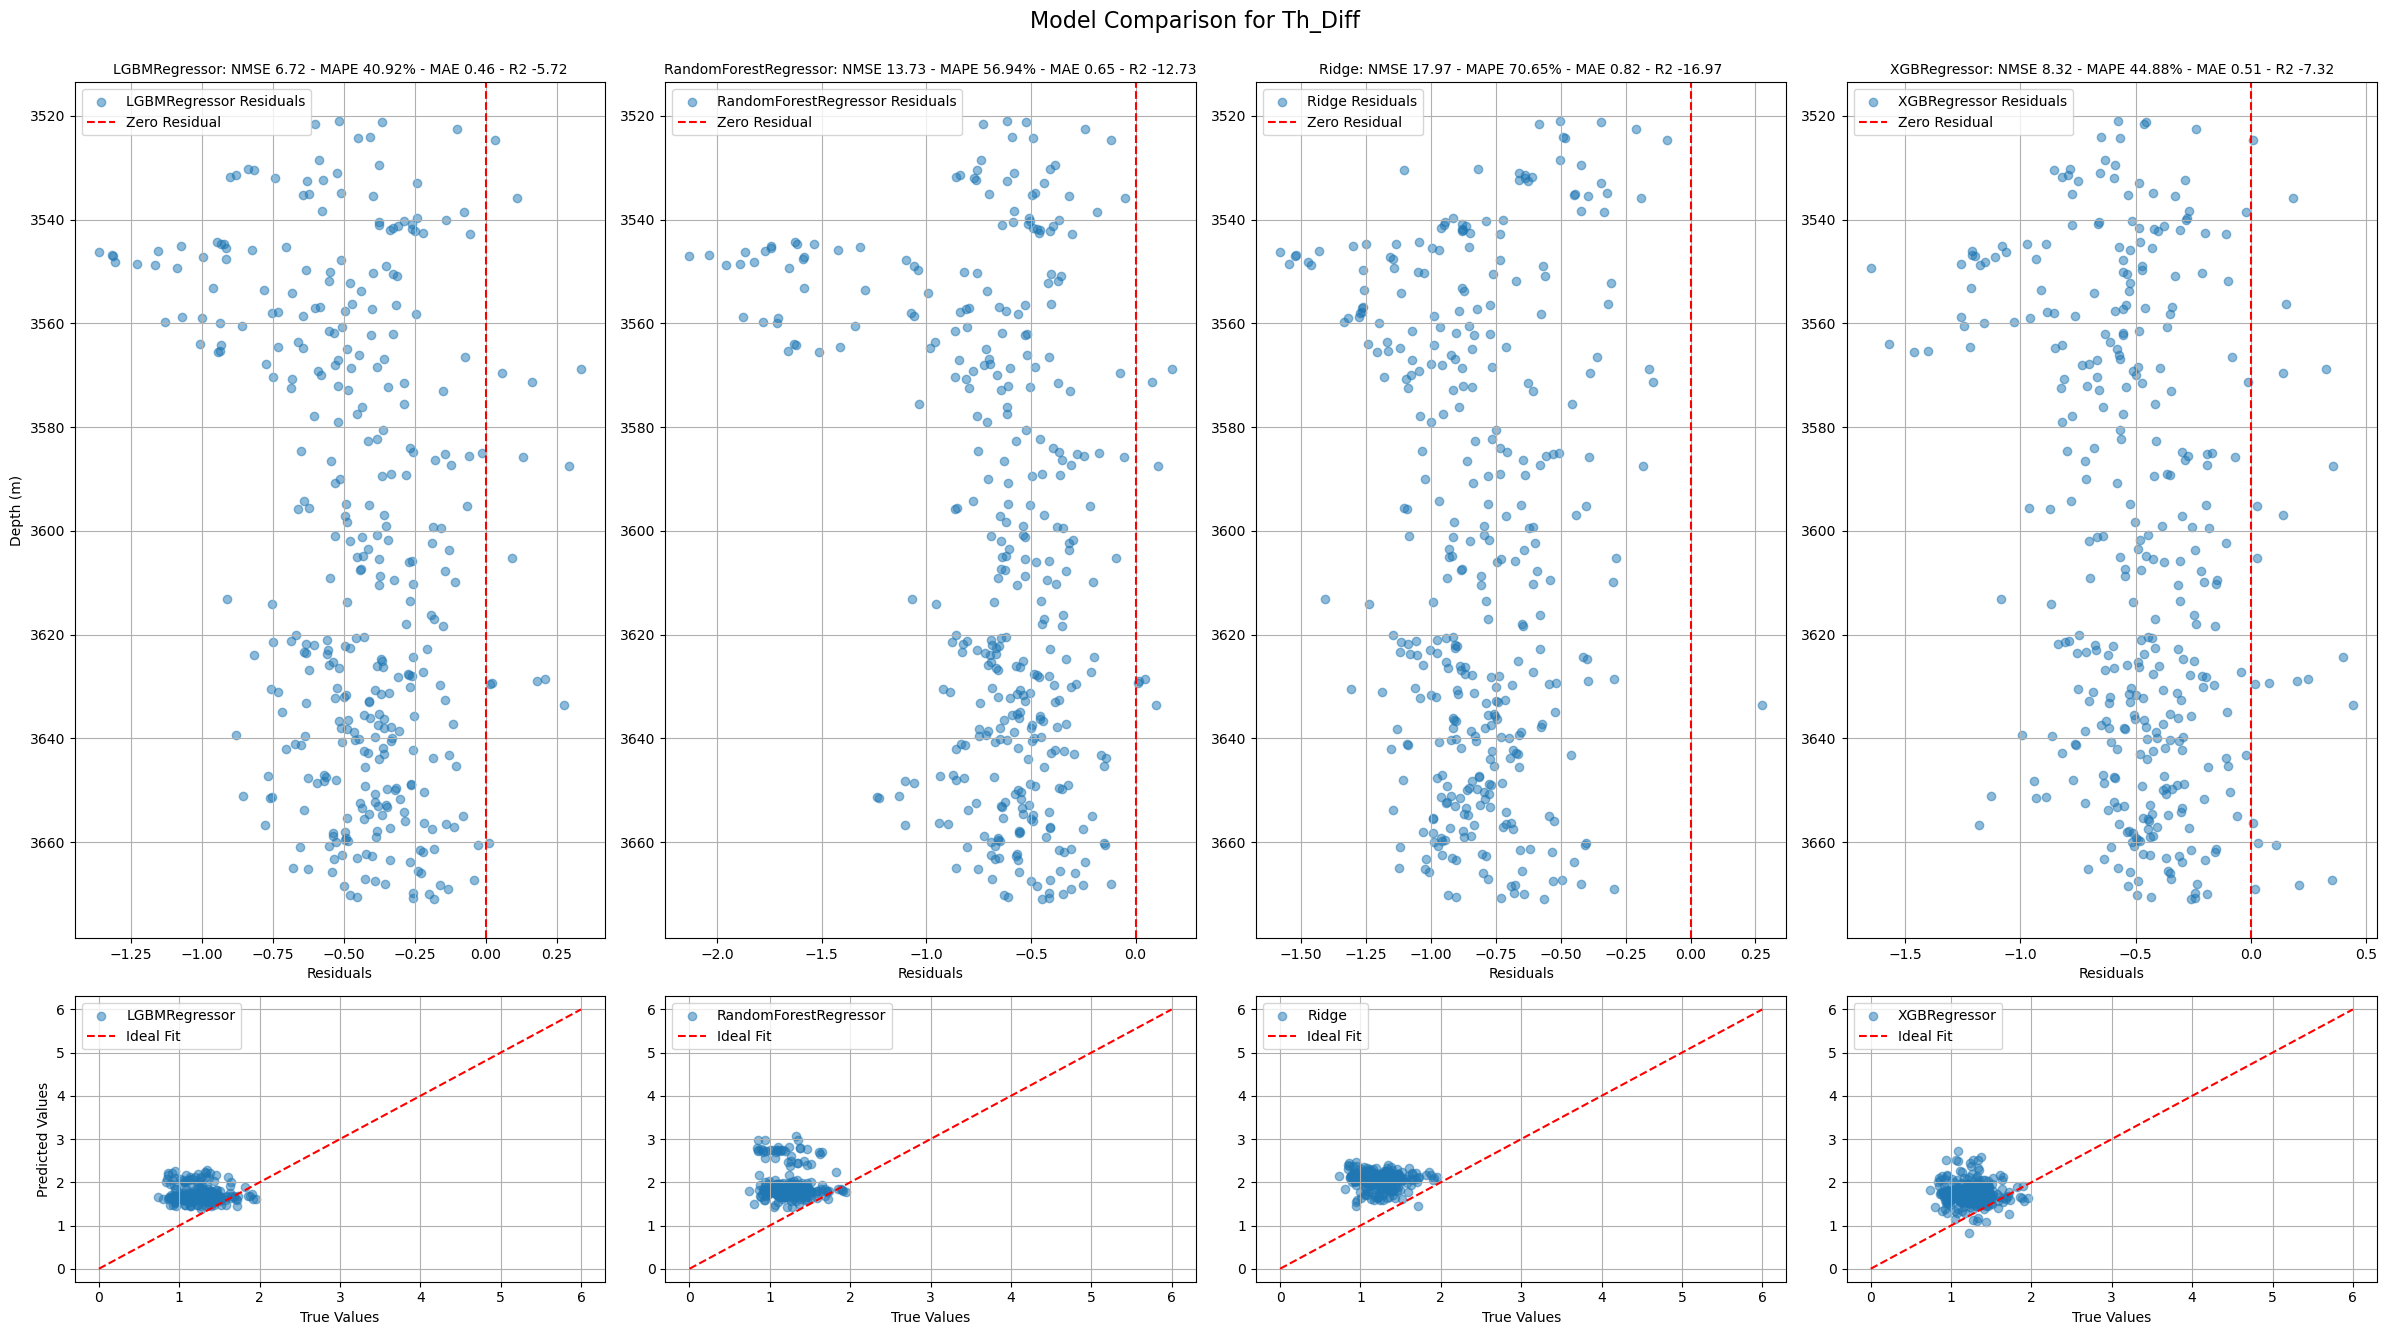

In [3]:
# Plot predictions for each well
for well in results_df['Well_ID'].unique():
    print(f'Well: {well}')
    framework.plot_model_comparison(results_df[results_df['Well_ID'] == well])

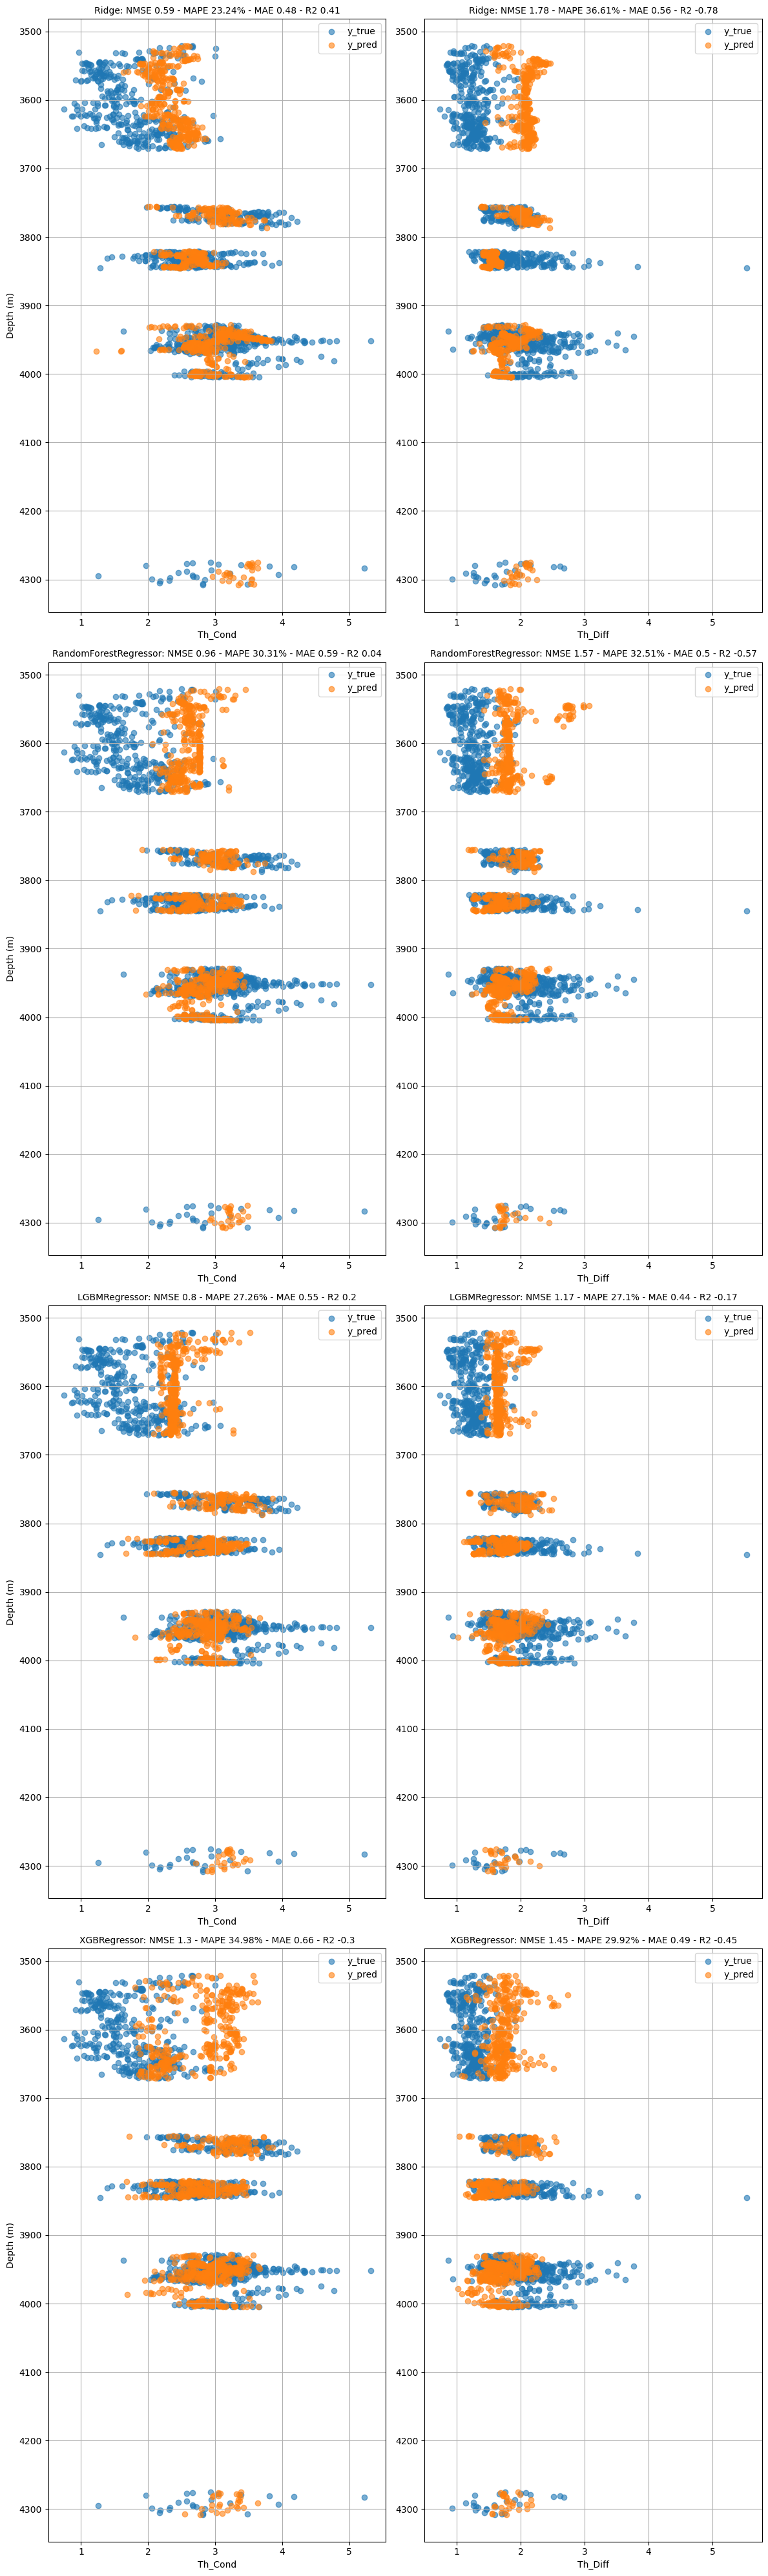

In [4]:
# Plot results
framework.plot_results_predictions(
    predictions_df=results_df,
    targets=TARGET_COLUMNS,  
    models=list(models_with_params.keys()),
    figsize=(15, 10), 
    alpha=0.6
)

Well: E18-05


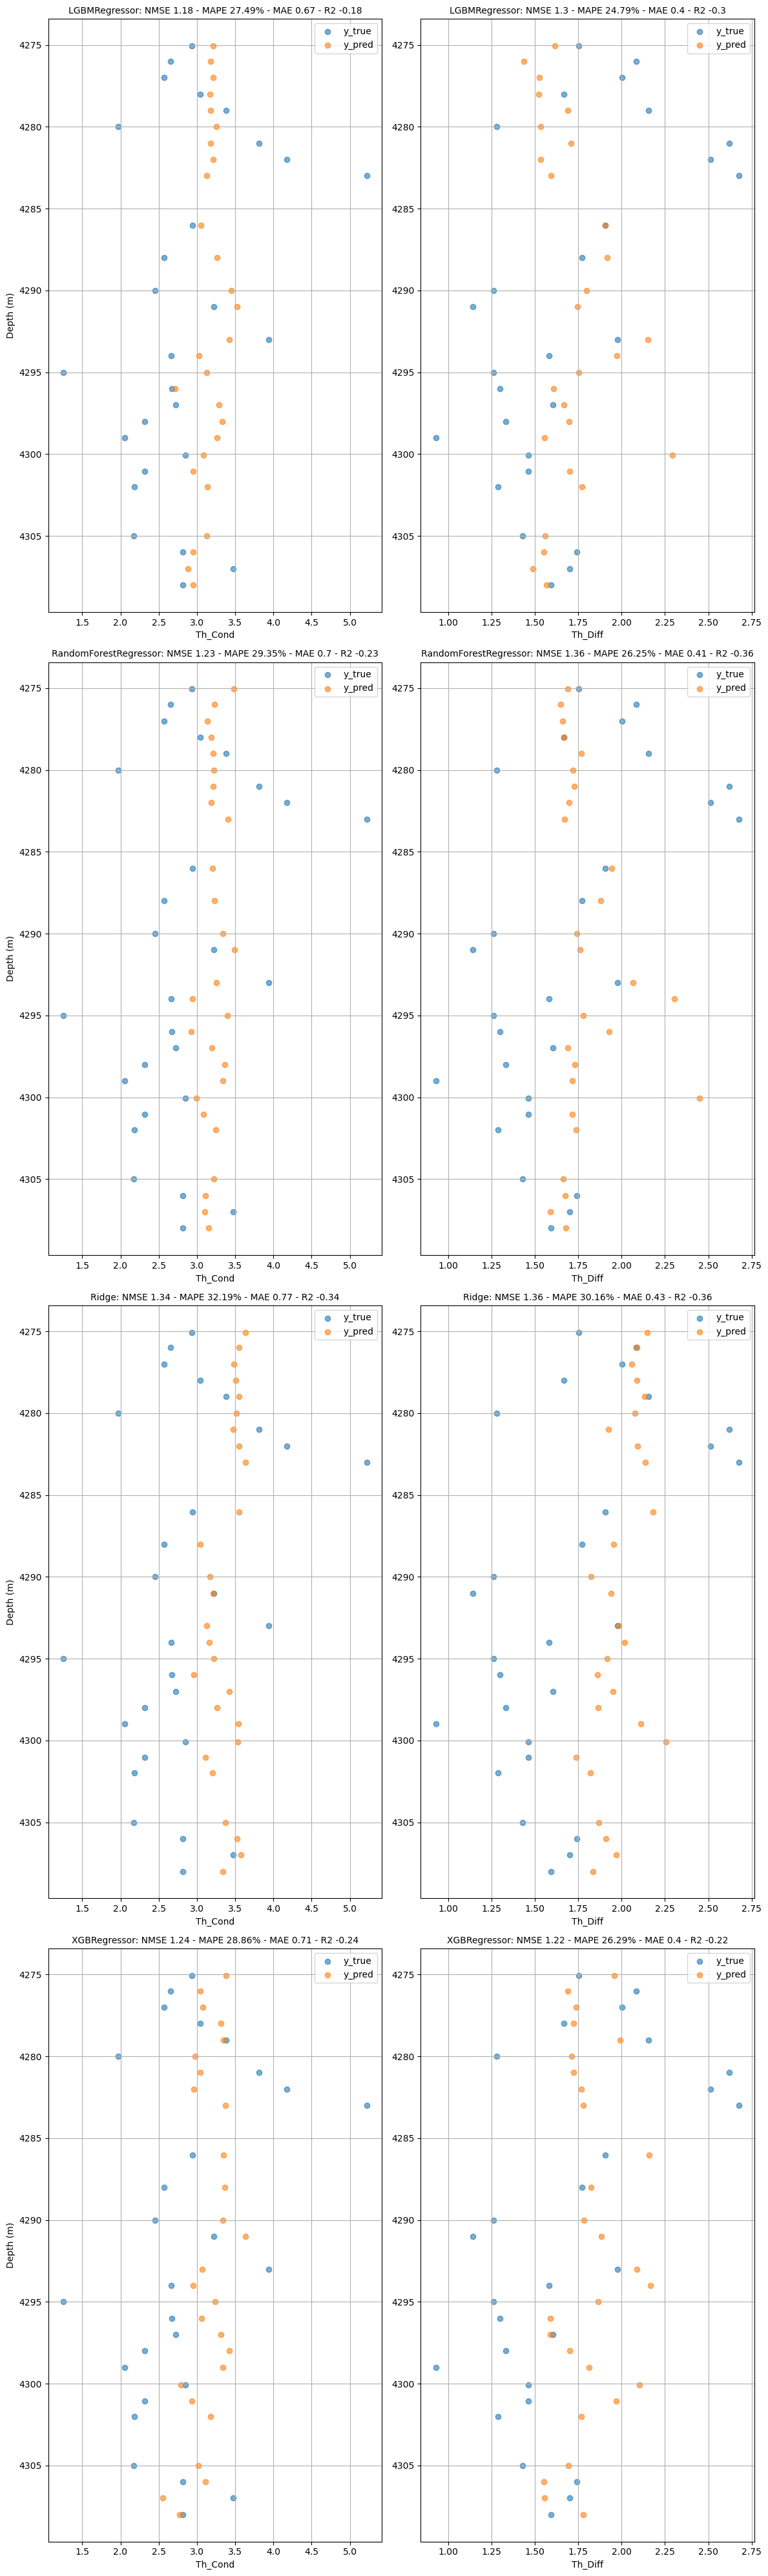

Well: K18-07x


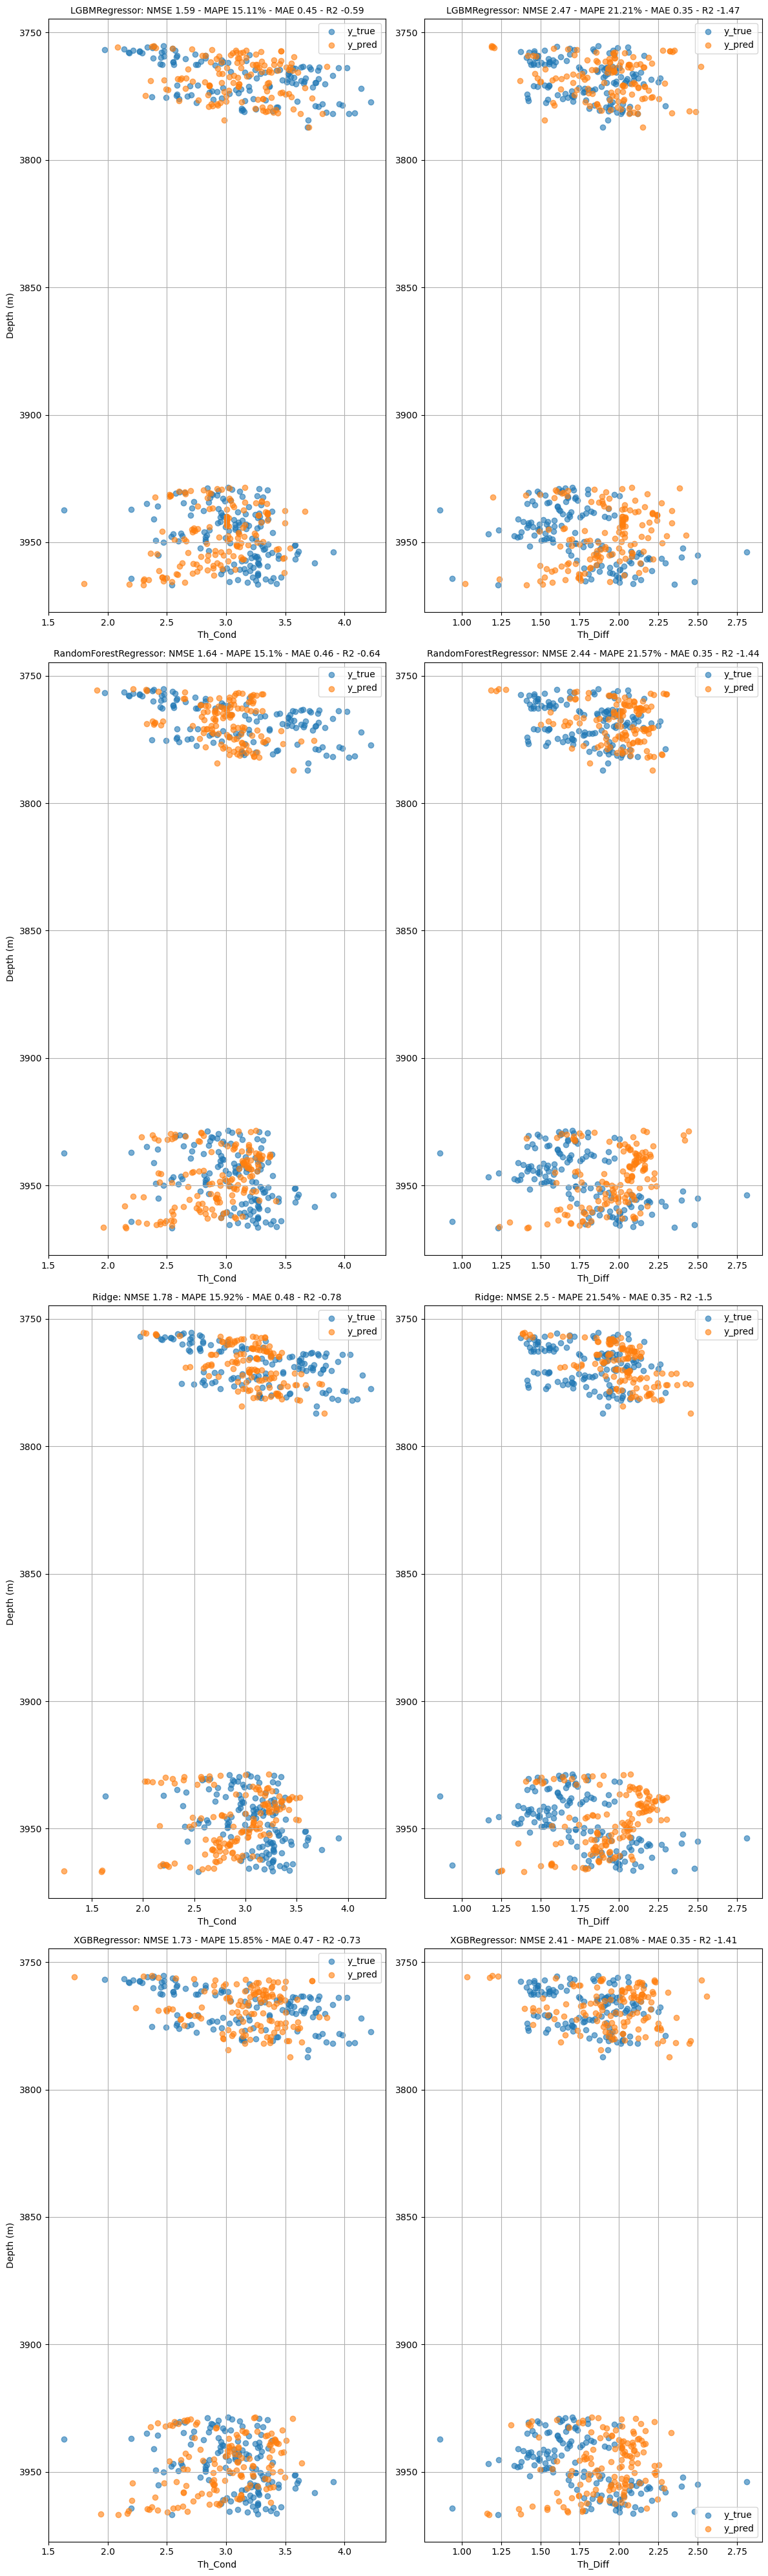

Well: K18-08


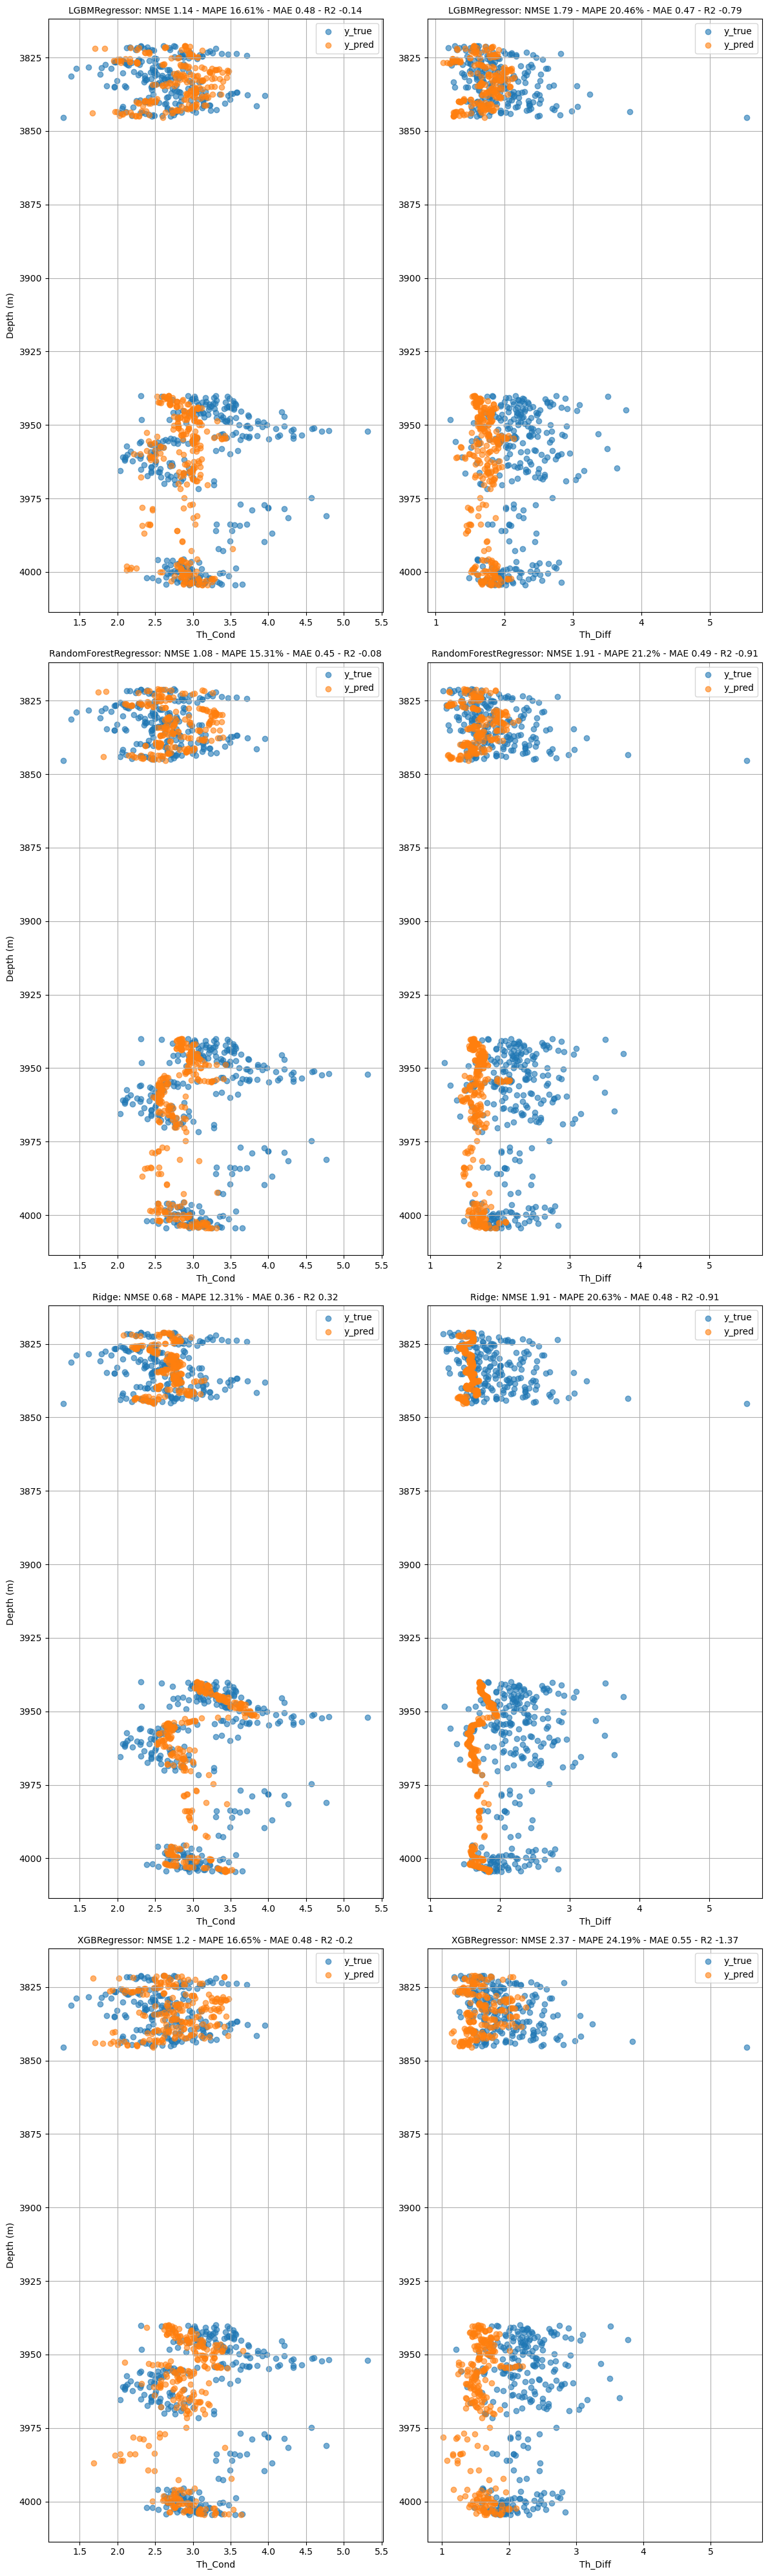

Well: ZRP-03a


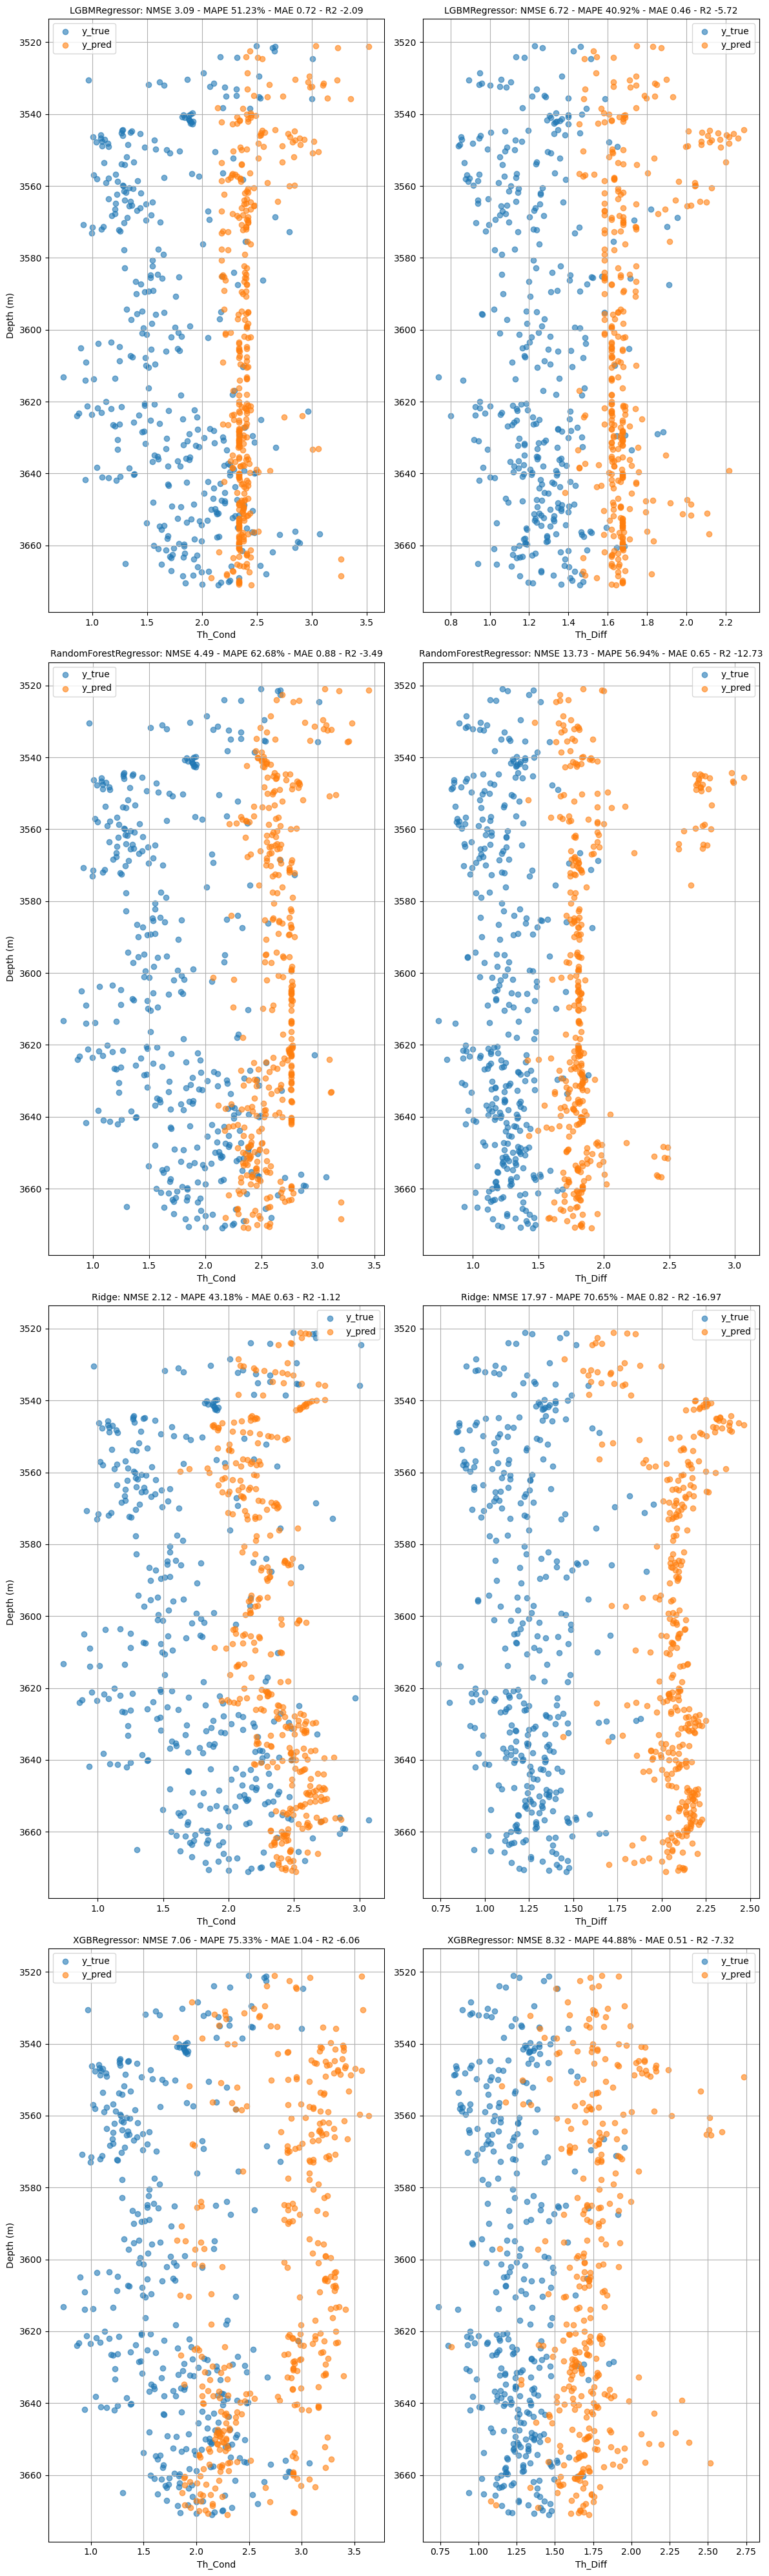

In [5]:
# Plot predictions for each well
for well in results_df['Well_ID'].unique():
    print(f'Well: {well}')
    framework.plot_results_predictions(results_df[results_df['Well_ID'] == well])

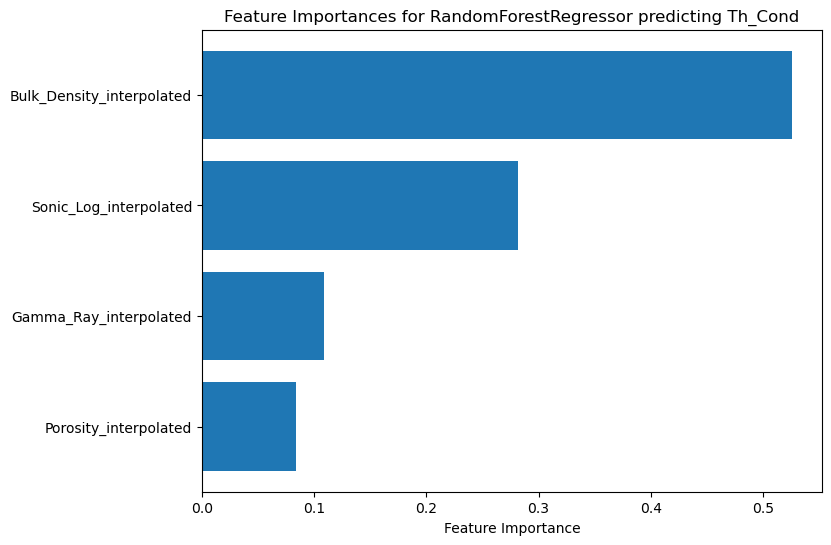

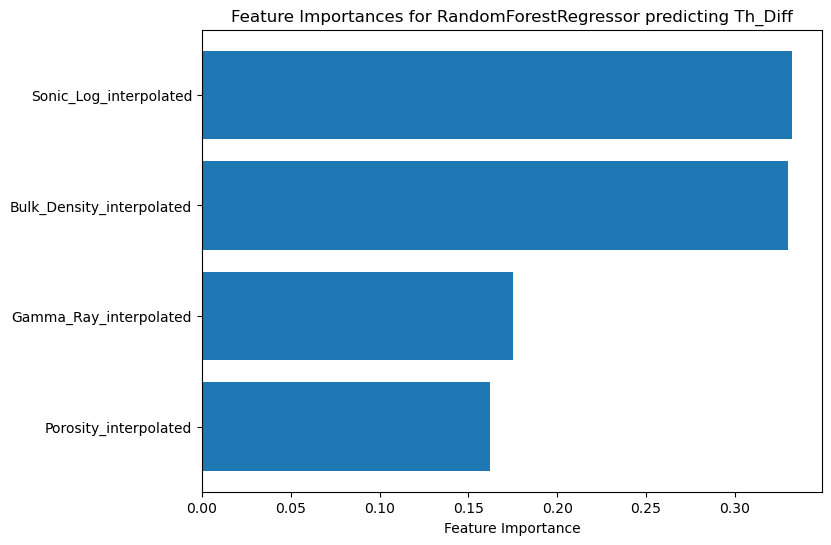

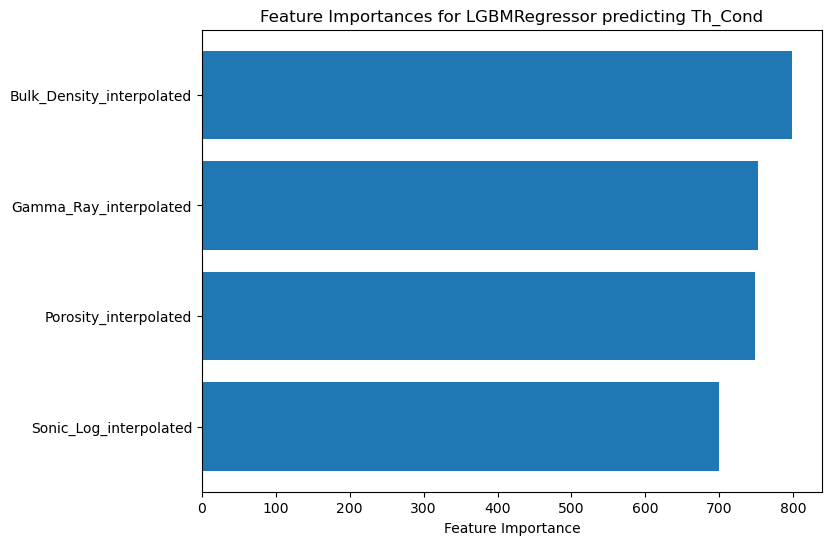

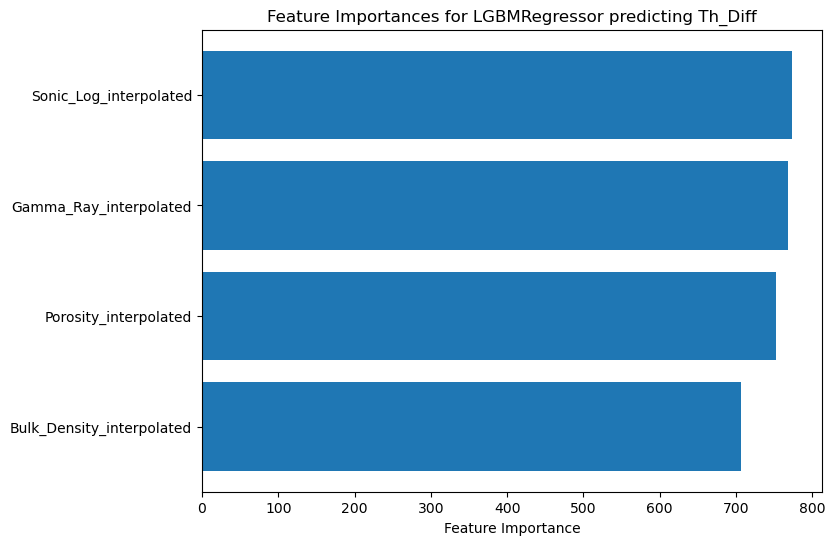

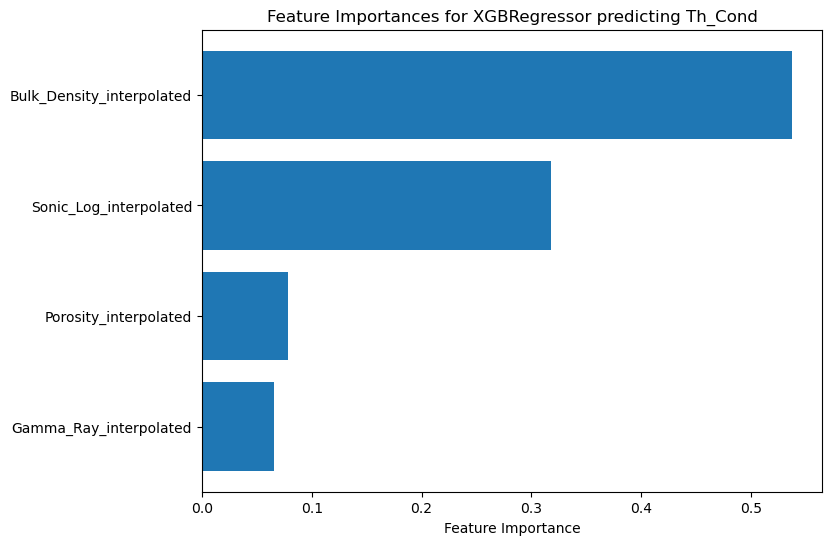

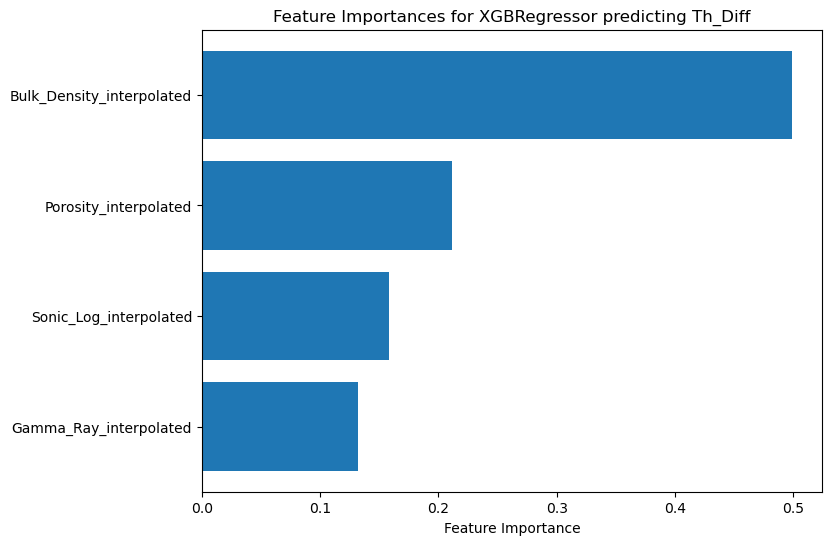

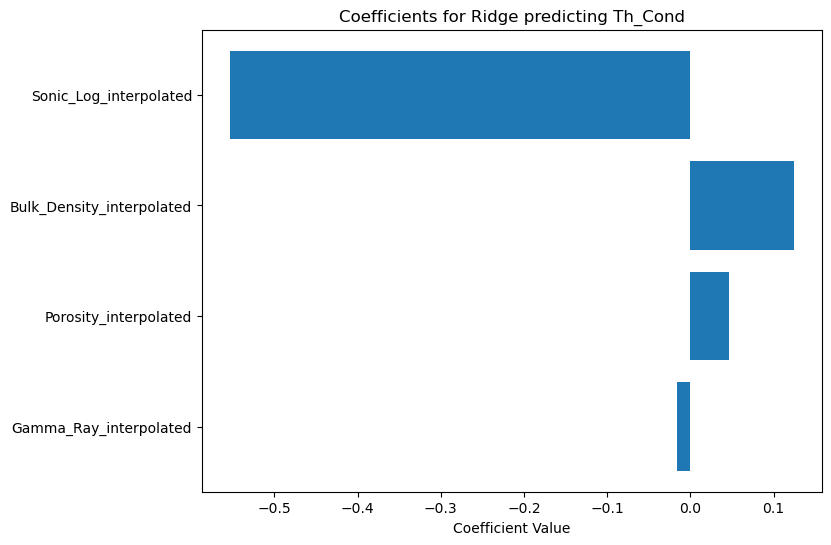

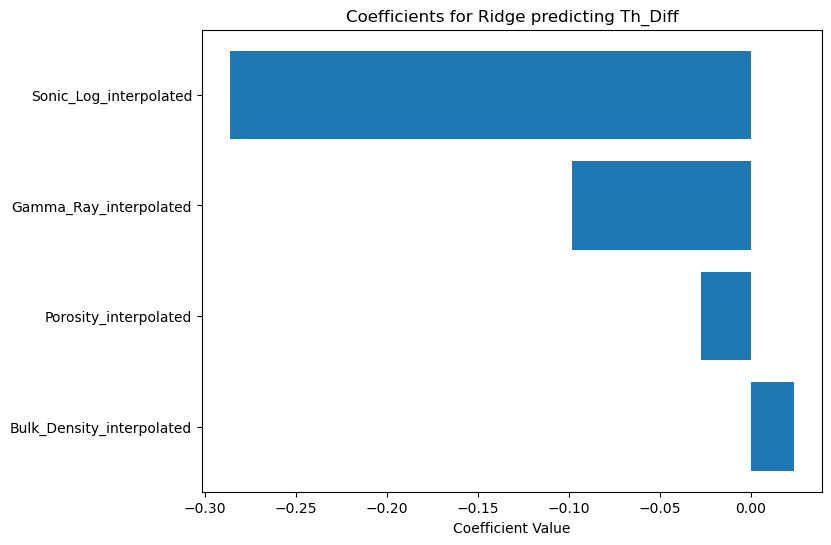

In [6]:
framework.plot_feature_importance(final_models)
framework.plot_coefficients(final_models)